# Kütüphaneleri & Data Setini yükleme

In [ ]:
!pip install catboost

In [ ]:
# Temel kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Uyarıları kapatma
import warnings
warnings.filterwarnings("ignore")

# Veri ön işleme
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modeller
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Değerlendirme metrikleri
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)


In [ ]:
# Renk Paletleri
paired_palette = sns.color_palette("Paired")
paired_colors = sns.color_palette("Paired", n_colors=12)

In [ ]:
df_train = pd.read_csv("heart_disease_uci.csv")

df= df_train.copy()

# **1. Problem Tanımı**



Bu projede, **Heart Disease UCI** veri seti kullanılarak bireylerin kalp hastalığı riski olup olmadığını tahmin etmeye yönelik bir sınıflandırma modeli geliştirilmiştir.

**Amaç:**

Verilen hasta bilgilerine dayanarak `num` değişkeninin (kalp hastalığı riski) 0 (yok) veya 1 (var) şeklinde sınıflandırılmasıdır.

**Problem Tipi:**

* **Sınıflandırma (Classification)** problemi

**Hedef Değişken:**

* `num`: Kalp hastalığı riski (0 = yok, 1 = var)


# **2. Veri Analizi ve Görselleştirme (EDA)**


## Veriye Genel Bakış

In [ ]:
#ilk 5 satırı göster
df.head().T

,0,1,2,3,4
id,1,2,3,4,5
age,63,67,67,37,41
sex,Male,Male,Male,Male,Female
dataset,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland
cp,typical angina,asymptomatic,asymptomatic,non-anginal,atypical angina
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
fbs,True,False,False,False,False
restecg,lv hypertrophy,lv hypertrophy,lv hypertrophy,normal,lv hypertrophy
thalch,150.0,108.0,129.0,187.0,172.0


In [ ]:
#son 5 satırı göster
df.tail().T

,915,916,917,918,919
id,916,917,918,919,920
age,54,62,55,58,62
sex,Female,Male,Male,Male,Male
dataset,VA Long Beach,VA Long Beach,VA Long Beach,VA Long Beach,VA Long Beach
cp,asymptomatic,typical angina,asymptomatic,asymptomatic,atypical angina
trestbps,127.0,NaN,122.0,NaN,120.0
chol,333.0,139.0,223.0,385.0,254.0
fbs,True,False,True,True,False
restecg,st-t abnormality,st-t abnormality,st-t abnormality,lv hypertrophy,lv hypertrophy
thalch,154.0,NaN,100.0,NaN,93.0



| Değişken   | Açıklama                                                                       |
| ---------- | ------------------------------------------------------------------------------ |
| `id`       | Her hasta için benzersiz ID                                                    |
| `age`      | Hastanın yaşı                                                                  |
| `origin`   | Çalışmanın yapıldığı yer                                                       |
| `sex`      | Cinsiyet (Male / Female)                                                       |
| `cp`       | Göğüs ağrısı tipi (typical angina, atypical angina, non-anginal, asymptomatic) |
| `trestbps` | Dinlenme kan basıncı (mm Hg)                                                   |
| `chol`     | Serum kolesterol düzeyi (mg/dl)                                                |
| `fbs`      | Açlık kan şekeri > 120 mg/dl (1=True; 0=False)                                 |
| `restecg`  | Dinlenme EKG sonucu (normal, stt abnormality, lv hypertrophy)                  |
| `thalach`  | Maksimum kalp atış hızı                                                        |
| `exang`    | Egzersize bağlı anjina (True / False)                                          |
| `oldpeak`  | Egzersize bağlı ST depresyonu                                                  |
| `slope`    | Egzersizde ST segment eğimi                                                    |
| `ca`       | Floroskopide görüntülenen ana damar sayısı (0-3)                               |
| `thal`     | Tahlil sonucu (normal, fixed defect, reversible defect)                        |
| `num`      | Hedef değişken (1 = kalp hastalığı var, 0 = yok)                               |

---

In [ ]:
print(f"Veri Seti {df.shape[0]} satır × {df.shape[1]} sütundan oluşur.")


Veri Seti 920 satır × 16 sütundan oluşur.


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,920.0,NaN,NaN,NaN,460.5,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920,2,Male,726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dataset,920,4,Cleveland,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cp,920,4,asymptomatic,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,861.0,NaN,NaN,NaN,132.132404,19.06607,0.0,120.0,130.0,140.0,200.0
chol,890.0,NaN,NaN,NaN,199.130337,110.78081,0.0,175.0,223.0,268.0,603.0
fbs,830,2,False,692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,918,3,normal,551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalch,865.0,NaN,NaN,NaN,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0


* Yaş ortalama 53.5 olup, 28 ile 77 arasında değişmektedir. Bu, veri setinin orta yaş ve üzeri bireylerden oluştuğunu gösterir.

* Cinsiyet (sex) değişkeninde büyük bir dengesizlik var: 920 kişiden 726’sı erkek (yaklaşık %79).

* Chest Pain Type (cp) değişkeninde en sık görülen değer asymptomatic (belirtisiz), bu da bireylerin çoğunun semptomsuz olduğunu gösteriyor.

* Kan basıncı (trestbps) ve kolesterol (chol) gibi sayısal değişkenlerde bazı sıfır değerler ve eksiklikler mevcut, bu da veride temizlik gerekebileceğini gösterir.

* oldpeak değişkeninde negatif bir min değer bulunması veri hatası olabileceğini düşündürüyor.

* slope, ca ve thal değişkenlerinde ciddi eksiklikler var (sırasıyla sadece 611, 309 ve 434 giriş mevcut).

* Hedef değişken olan num, 0 ile 4 arasında değişiyor ve ortalaması 1 civarında. Bu, kalp hastalığı olan bireylerin sayısının yüksek olabileceğini gösteriyor.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB




###  **Veri Kümesi Genel Yapısı**

* **Toplam gözlem:** 920
* **Toplam sütun:** 16
* **Veri tipleri:**

  * 5 tane `float64` (sürekli sayısal veriler)
  * 3 tane `int64` (tamsayı veriler)
  * 8 tane `object` (kategorik ya da string veri)

---


In [ ]:
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
df['target'].value_counts()

,count
target,
1,509
0,411


### Figür: Kalp Hastalığı Dağılımı

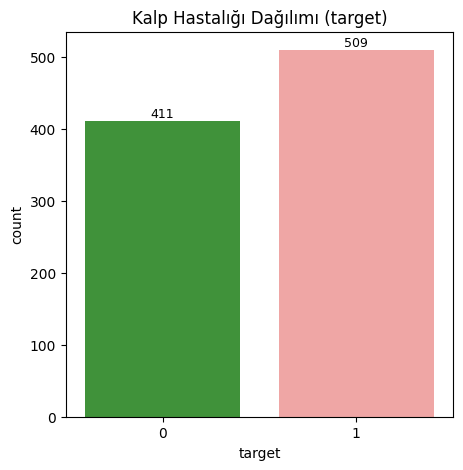

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x='target', data=df, palette=[paired_colors[3], paired_colors[4]])
for p in ax.patches:
  value = int(p.get_height())
  ax.annotate(f'{value}', (p.get_x() + p.get_width() / 2., p.get_height()),
              ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
              textcoords='offset points')

plt.title("Kalp Hastalığı Dağılımı (target)")
plt.show()

In [ ]:
# Sayısal sütunları seç (int64 ve float64)
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Sayısal sütunların sayısını ve adlarını satır satır görüntüle
print(f"Toplam Sayısal Sütunlar: {len(num_cols.columns)}\n")
print(*num_cols.columns.tolist(), sep='\n')

Toplam Sayısal Sütunlar: 9

id
age
trestbps
chol
thalch
oldpeak
ca
num
target


In [ ]:
# Kategorik sütunları seçin (nesne, kategori, bool)
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

#Kategorik sütunların sayısını ve adlarını satır satır görüntüle
print(f"Kategorik Sütunlar: {len(cat_cols)}\n")
print(*cat_cols, sep='\n')

Kategorik Sütunlar: 8

sex
dataset
cp
fbs
restecg
exang
slope
thal


## **Eksik Veri Analizi**

In [ ]:
#eksik veri sayısı
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
missing_percent= df.isnull().sum() / len(df) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
print("Yüzdelik Olarak Eksik Verilerin Dağılımı\n", missing_percent.sort_values(ascending=False))


Yüzdelik Olarak Eksik Verilerin Dağılımı
 ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
exang        5.978261
thalch       5.978261
chol         3.260870
restecg      0.217391
dtype: float64


### Figür: Yüzdelik Olarak Eksik Veriler

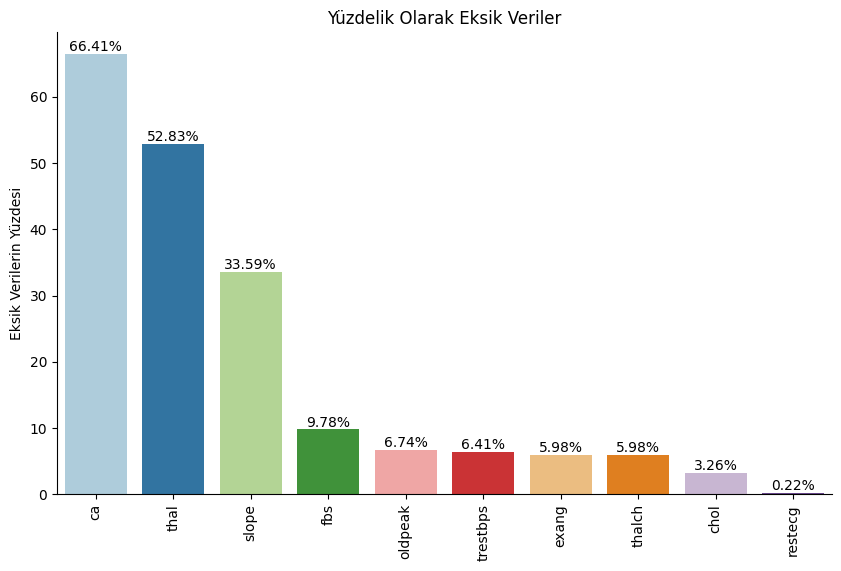

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette= paired_palette)
plt.title("Yüzdelik Olarak Eksik Veriler")
plt.xlabel("")
plt.ylabel("Eksik Verilerin Yüzdesi")
for i, v in enumerate(missing_percent.values):
    plt.text(i, v, f"{v:.2f}%", ha="center", va="bottom")
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xticks(rotation=90)
plt.show()


### Figür: Eksik Verilerin Konumu - Heatmap

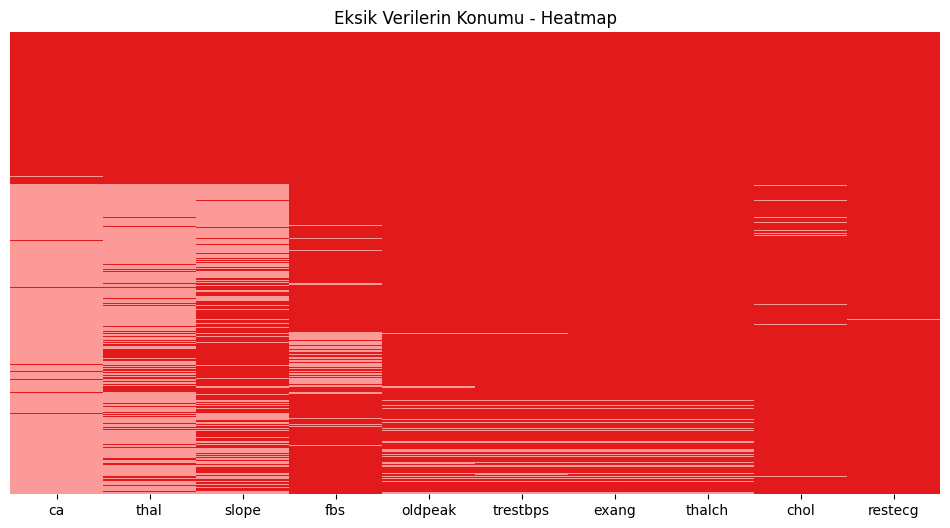

In [ ]:
# Eksik ve eksik olmayan veriler için özel renkler
color_for_not_missing = "#e31a1c"  # Kırmızı tonu
color_for_missing = "#fb9a99"      # Pembe tonu

custom_paired_cmap = ListedColormap([color_for_not_missing, color_for_missing])

plt.figure(figsize=(12, 6))
sns.heatmap(df[missing_percent.index].isnull(), cbar=False, yticklabels=False,
            cmap=custom_paired_cmap)
plt.title("Eksik Verilerin Konumu - Heatmap")
plt.show()

In [ ]:
# 'id', 'num', 'ca', 'thal' sütunlarını düşür
df.drop(columns=["id", "num", "ca", "thal"], inplace=True)

# Sayısal veriler (KNN Imputer uygulanacak)
knn_cols = ["trestbps", "chol", "thalch", "oldpeak"]

# Kategorik veriler (mode ile doldurulacak)
mode_cols = ["slope", "fbs", "restecg", "exang"]

In [ ]:
# Sayısal ve kategorik verileri ayır
df_knn = df[knn_cols]
print("Sayısal Veriler\n", df_knn)
df_mode = df[mode_cols]
print("Kategorik Veriler\n", df_mode)

Sayısal Veriler
      trestbps   chol  thalch  oldpeak
0       145.0  233.0   150.0      2.3
1       160.0  286.0   108.0      1.5
2       120.0  229.0   129.0      2.6
3       130.0  250.0   187.0      3.5
4       130.0  204.0   172.0      1.4
..        ...    ...     ...      ...
915     127.0  333.0   154.0      0.0
916       NaN  139.0     NaN      NaN
917     122.0  223.0   100.0      0.0
918       NaN  385.0     NaN      NaN
919     120.0  254.0    93.0      0.0

[920 rows x 4 columns]
Kategorik Veriler
            slope    fbs           restecg  exang
0    downsloping   True    lv hypertrophy  False
1           flat  False    lv hypertrophy   True
2           flat  False    lv hypertrophy   True
3    downsloping  False            normal  False
4      upsloping  False    lv hypertrophy  False
..           ...    ...               ...    ...
915          NaN   True  st-t abnormality  False
916          NaN  False  st-t abnormality    NaN
917          NaN   True  st-t abnormality  

In [ ]:
# KNN Imputer uygula (sayısal)
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=knn_cols)

# Mode ile doldurma (kategorik)
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode_imputed = pd.DataFrame(mode_imputer.fit_transform(df_mode), columns=mode_cols)

# Diğer değişkenleri al
other_cols = df.drop(columns=knn_cols + mode_cols).reset_index(drop=True)

# İmpute edilen verilerle birleştir
df_cleaned = pd.concat([other_cols, df_knn_imputed, df_mode_imputed], axis=1)


In [ ]:
# Son kontrol: eksik değer kalmış mı?
missing_summary = df_cleaned.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]
missing_summary

,0


In [ ]:
df_cleaned.head().T

,0,1,2,3,4
age,63,67,67,37,41
sex,Male,Male,Male,Male,Female
dataset,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland
cp,typical angina,asymptomatic,asymptomatic,non-anginal,atypical angina
target,0,1,1,0,0
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
thalch,150.0,108.0,129.0,187.0,172.0
oldpeak,2.3,1.5,2.6,3.5,1.4
slope,downsloping,flat,flat,downsloping,upsloping


Veri setinde bulunan eksik değerler, yalnızca niceliksel olarak değil aynı zamanda **eksikliğin türü** bakımından da analiz edilmiştir. Eksik veriler üç farklı yapıda olabilir:

* **MCAR (Missing Completely at Random):** Eksiklik tamamen rastgele, herhangi bir değişkenle ilişkili değil.
* **MAR (Missing at Random):** Eksiklik başka bir gözlemlenebilir değişkenle ilişkili.
* **MNAR (Missing Not at Random):** Eksiklik, değişkenin kendisinden kaynaklanıyor.

**Değerlendirme Kriterim**

Eksik veri oranı çok yüksek olan bazı değişkenlerin (örneğin `ca` ve `thal`) rastgele eksiklenmediği; hastaların test edilmemesi, tahlil sonuçlarının alınmaması gibi sistematik nedenlerle eksik olduğu düşünülmektedir. Bu da **MNAR** olma olasılıklarını artırmaktadır.

Bu durumda:

>  Bu değişkenleri doldurmak, gerçekte hiç yapılmamış bir testin sonucunu tahmin etmek anlamına geleceğinden **modelin güvenilirliğini düşürebilir**.

Dolayısıyla:

* **`ca` (%66 eksik)** ve **`thal` (%53 eksik)**: Bu iki sütunun eksiklik oranı hem çok yüksekti hem de büyük olasılıkla **MNAR** kategorisinde. Bu nedenle modelden çıkarılması, daha sağlıklı bir yaklaşım oldu.

####  Doldurulan Değişkenler ve Nedenleri

Kalan eksik veriler (%0.2 ila %33 arası) için eksikliklerin daha çok **MCAR veya MAR** olduğu değerlendirildi. Özellikle:

* `fbs`, `restecg`, `slope`, `exang` gibi kategorik sütunlardaki eksiklikler genellikle **rastgele** görünmektedir. (MCAR/MAR)
* `trestbps`, `chol`, `thalch`, `oldpeak` gibi sürekli değişkenler ise veri yapısına bağlı olarak **yakın gözlem değerleri** üzerinden tahmin edilebilir (MAR).

Bu nedenle:

* **Sayısal Değişkenler için:** `KNNImputer` uygulandı. Bu yöntem, eksik verileri benzer gözlemlerden yararlanarak doldurur. Özellikle MAR durumlarında oldukça başarılıdır.
* **Kategorik Değişkenler için:** Mod (en sık görülen değer) ile doldurma yapıldı. Bu, MCAR varsayımı altında basit ama etkili bir yaklaşımdır.

> Sonuç olarak, modelin güvenilirliğini artırmak amacıyla veri seti içinde yalnızca **doldurulabilir** nitelikteki eksiklikler tahmin edilerek tamamlanmış, diğerleri ise tamamen çıkarılmıştır.

---



## Aykırı Değer Analizi

### Figür: Sayısal Değişkenler Arasında Aykırı Değer Tespiti

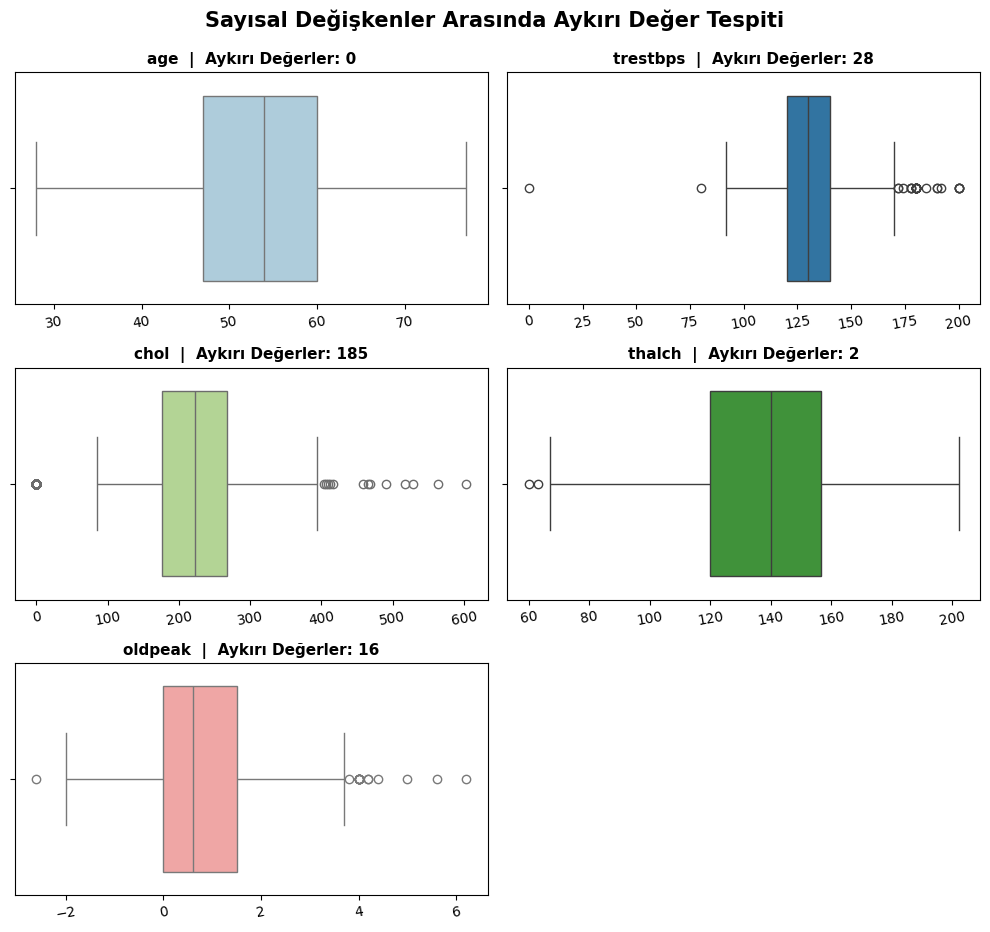

In [ ]:
# Sayısal sütunları seç
num_cols = df_cleaned.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])

# Alt grafik yapısı
num_plots = len(num_cols.columns)
cols = 2
rows = int(np.ceil(num_plots / cols))

# Grafik alanı oluştur
fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
axes = axes.flatten()

# Her bir sayısal sütun için boxplot ve outlier sayısı
for i, col in enumerate(num_cols.columns):
    Q1 = num_cols[col].quantile(0.25)
    Q3 = num_cols[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((num_cols[col] < lower_bound) | (num_cols[col] > upper_bound)).sum()

    sns.boxplot(x=num_cols[col], ax=axes[i], color=paired_colors[i])
    axes[i].set_title(f"{col}  |  Aykırı Değerler: {outlier_count}", fontsize=11, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', labelrotation=10)
    axes[i].grid(False)

# Kullanılmayan boş grafik alanlarını kaldır
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Başlık ve düzenleme
plt.tight_layout()
fig.suptitle('Sayısal Değişkenler Arasında Aykırı Değer Tespiti', fontweight='bold', size=15, y=1.03)
plt.show()

In [ ]:
def winsorize_column(df_cleaned, col):
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_cleaned[col] = df_cleaned[col].apply(lambda x: upper if x > upper else (lower if x < lower else x))
    return df_cleaned


In [ ]:
def replace_outliers_with_median(df_cleaned, column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median = df_cleaned[column].median()

    df_cleaned[column] = df_cleaned[column].apply(lambda x: median if x < lower or x > upper else x)
    return df_cleaned

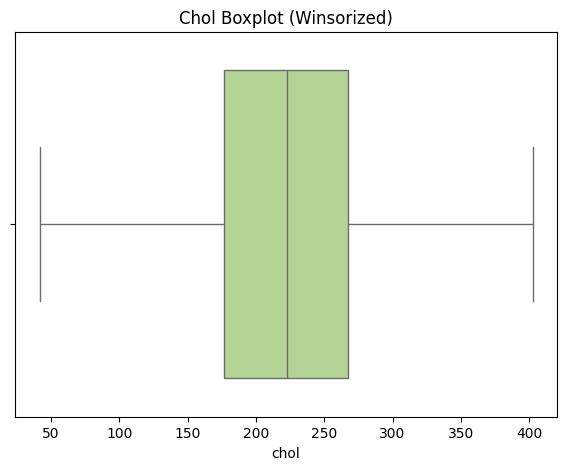

In [ ]:
# chol → winsorize
df_cleaned = winsorize_column(df_cleaned, 'chol')

fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x=df_cleaned['chol'], ax=ax, color=paired_colors[2])
plt.title("Chol Boxplot (Winsorized)")
plt.show()

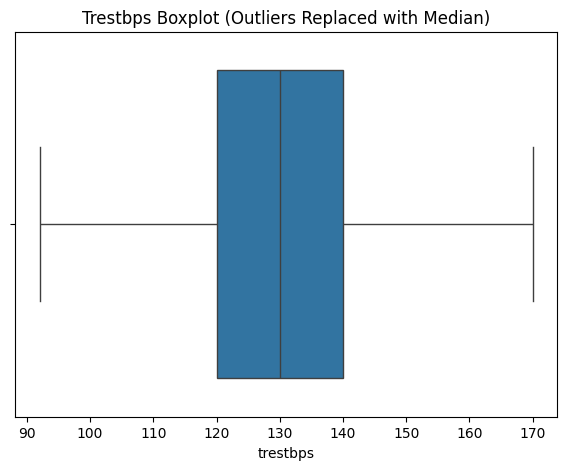

In [ ]:
#  trestbps → aykırıları medyanla değiştir
df_cleaned = replace_outliers_with_median(df_cleaned, 'trestbps')

fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x=df_cleaned['trestbps'], ax=ax, color=paired_colors[1])
plt.title("Trestbps Boxplot (Outliers Replaced with Median)")
plt.show()

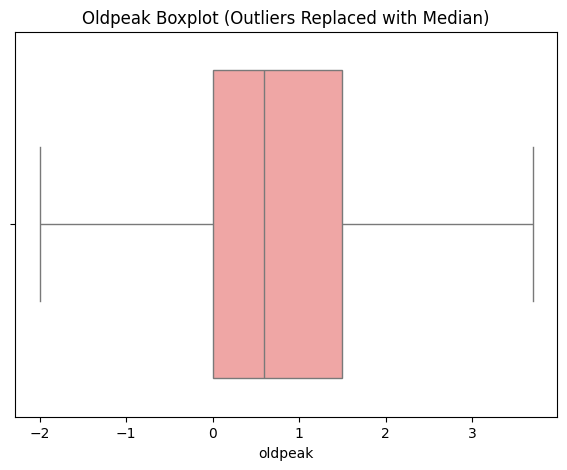

In [ ]:
# oldpeak → aykırıları medyanla değiştir
df_cleaned = replace_outliers_with_median(df_cleaned, 'oldpeak')

fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x=df_cleaned['oldpeak'], ax=ax, color=paired_colors[4])
plt.title("Oldpeak Boxplot (Outliers Replaced with Median)")
plt.show()

In [ ]:
def get_outlier_summary(df_cleaned, columns):
    summary = []

    for col in columns:  # Iterate directly through the list
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_count = ((df_cleaned[col] < lower) | (df_cleaned[col] > upper)).sum() # Corrected to use df_cleaned

        summary.append({
            "Değişken": col,
            "Aykırı Değer Sayısı": outlier_count
        })

    return pd.DataFrame(summary).sort_values(by="Aykırı Değer Sayısı", ascending=False)

print("Aykırı Değer Özeti:\n")

# Assuming num_cols is a list of column names you want to check for outliers
# If num_cols is not defined, you might need to get the numerical column names from df_cleaned
num_cols_for_outlier_check = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
outlier_table = get_outlier_summary(df_cleaned, num_cols_for_outlier_check)
print(outlier_table)

Aykırı Değer Özeti:

   Değişken  Aykırı Değer Sayısı
4    thalch                    2
0       age                    0
1    target                    0
2  trestbps                    0
3      chol                    0
5   oldpeak                    0


1. Aykırı Değer İşleme Stratejim – Medikal Yaklaşım

Veri setindeki değişkenlerin büyük çoğunluğu medikal parametrelerden oluştuğu için, aykırı değerleri işlerken istatistiksel sınırların yanı sıra **klinik gerçeklikleri** de dikkate aldım. Özellikle:

- `chol` (kolesterol),
- `trestbps` (dinlenme kan basıncı),
- `oldpeak` (egzersize bağlı ST depresyonu)

gibi değişkenlerde tespit edilen uç değerler doğrudan silinmemiştir. Bu değişkenler, bir hastanın kardiyovasküler risk profilini doğrudan etkileyebilecek önemli biyobelirteçlerdir. Dolayısıyla, her biri için şu stratejiler izlenmiştir:

- **`chol` için**: Winsorization yöntemi uygulandı. Klinik açıdan beklenmedik derecede yüksek kolesterol değerleri nadiren de olsa gerçek olabilir. Ancak modelin öğrenmesini bozmamak adına uç değerler sınırlandırılarak korunmuştur.

- **`trestbps` ve `oldpeak` için**: Aykırı değer sayısı daha yüksek olduğu için bu değerler medyanla değiştirildi. Medyan, sağlık verilerinde güvenilir bir temsil ölçüsüdür ve ekstrem durumların etkisini dengelerken, verinin yapısını da korur.

- **`thalch` için**: Sadece 2 uç değer bulundu ve bunlar muhtemelen klinik olarak anlamlı istisnalardı. Bu nedenle modelin genelleyici gücünü artırmak adına müdahale edilmedi.

- **`slope` ve `sex` gibi değişkenler**: Sayısal görünmelerine rağmen kategorik oldukları için aykırı değer analizi dışında tutuldu.

Bu yaklaşım sayesinde, hem istatistiksel güvenilirlik hem de **klinik geçerlilik** korunmuş oldu.


# **4. Görselleştirme ve EDA (Keşifsel Veri Analizi)**

### Figure: Sayısal Değişkenler Arasında Korelasyon

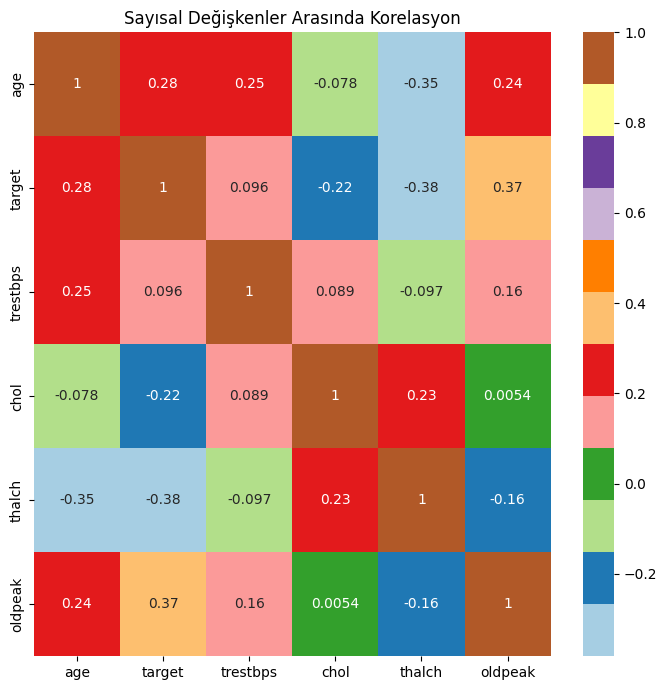

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(df_cleaned.select_dtypes(include=np.number).corr(), annot=True, cmap='Paired')
plt.title('Sayısal Değişkenler Arasında Korelasyon')
plt.tight_layout()
plt.show()

 `target` (kalp hastalığı) ile olan korelasyonlar

- **`thalach` (maksimum kalp atış hızı)** → **-0.38**:
  - Kalp hastalığı olan bireylerde maksimum kalp atış hızının genellikle düşük olduğu görülmüştür.
  - Bu durum, kalp hastalarının egzersiz kapasitesinin sınırlı olmasıyla klinik olarak uyumludur.

- **`oldpeak` (ST depresyonu)** → **+0.37**:
  - ST segment depresyonu arttıkça kalp hastalığı olasılığı da artmaktadır.
  - EKG bulgusu olarak önemli bir prediktördür.

- **`age` (yaş)** → **+0.28**:
  - Yaş arttıkça kalp hastalığı riskinin arttığı görülmüştür.
  - Bu sonuç, kardiyovasküler risk faktörleri arasında yaşın önemli bir yer tuttuğunu doğrulamaktadır.

- **`chol` (kolesterol)** → **-0.22**:
  - Negatif korelasyon gözlemlenmiştir.
  - Bu durum, bazı hastaların ilaç kullanımıyla kolesterol değerlerinin kontrol altına alınmış olabileceğine işaret edebilir.

- **`trestbps` (dinlenme kan basıncı)** → **+0.096**:
  - Kalp hastalığı ile zayıf düzeyde pozitif ilişki göstermektedir.
  - Tansiyon tek başına güçlü bir belirteç olmayabilir.

---


- **`age` – `thalach`** → **-0.35**:
  - Yaş arttıkça egzersizle ulaşılan maksimum kalp atış hızı düşmektedir.
  - Bu, yaşlanmanın fizyolojik etkilerine uygun bir bulgudur.

- **`age` – `oldpeak`** → **+0.24**:
  - Yaşlı bireylerde ST segment depresyonunun daha sık görüldüğünü göstermektedir.
  - Klinik olarak anlamlı ve destekleyici bir ilişki.

---

 Genel Değerlendirme

Bu korelasyon matrisi, özellikle `thalach`, `oldpeak` ve `age` değişkenlerinin kalp hastalığını tahmin etmede güçlü belirleyiciler olabileceğini göstermektedir. Modelleme sürecinde bu değişkenlerin öne çıkması beklenmelidir. Diğer yandan `chol` gibi klinik önemi yüksek bazı değişkenlerde düşük korelasyon bulunması, verinin klinik geçmişi (ilaç kullanımı, müdahale sonrası ölçüm vb.) ile açıklanabilir.



In [ ]:
num_cols2 = df_cleaned.select_dtypes(include=["int64", "float64"]).drop(columns=["target"])
len(num_cols2.columns)

5

### Figür: Sayısal Değişkenlerin Histogramları

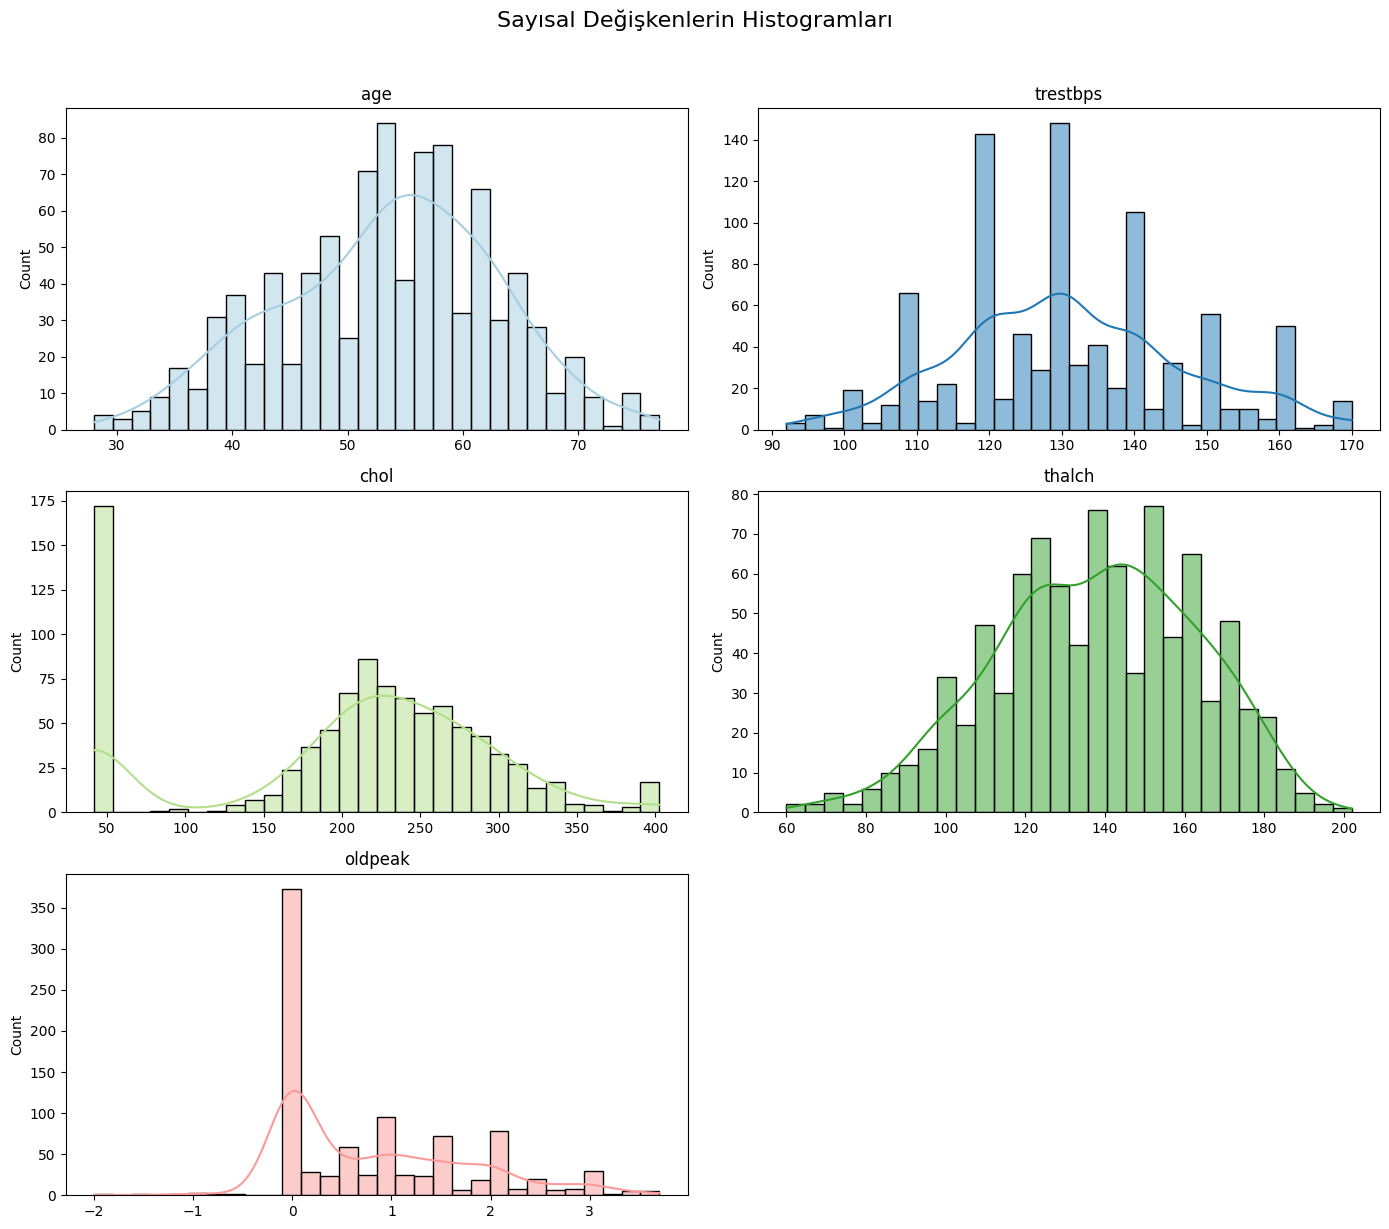

In [ ]:
colors = sns.color_palette("Paired", len(num_cols2))
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

# Her değişken için histogram çiz
for i, col in enumerate(num_cols2):
    sns.histplot(df_cleaned[col], kde=True, bins=30, color=colors[i], ax=axes[i])
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")

# Kullanılmayan eksik grafik alanlarını sil
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.suptitle("Sayısal Değişkenlerin Histogramları", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


Yukarıdaki grafiklerde veri setindeki önemli sayısal değişkenlerin histogramları yer almaktadır. Bu görseller, değişkenlerin dağılımlarını ve aykırı değer eğilimlerini anlamamıza yardımcı olur.

- **age** ve **thalach** değişkenleri simetrik ve yaklaşık normal dağılım göstermektedir. Bu, modelleme sürecinde bu değişkenlerin doğrusallığa dayalı algoritmalarla uyumlu çalışabileceğini gösterir.
  
- **trestbps** ve **chol** değişkenleri, merkezi eğilim çevresinde yoğunlaşsa da aykırı değerlerin varlığı dikkat çekmektedir. Bu durum, özellikle kolesterol ölçümlerinde verinin sağ kuyruklu dağıldığını ve ekstrem değerler içerdiğini gösterir.

- **oldpeak** değişkeni ise oldukça sağa çarpık (pozitif skew) bir dağılıma sahiptir. Bu, hastalarda ST depresyonunun çoğunlukla 0 civarında olduğu ancak az sayıda yüksek değerin bulunduğunu gösterir.

Klinik açıdan bu dağılımlar, birçok bireyin normal sınırlar içinde yer aldığını; ancak bazı bireylerin ciddi klinik riskler taşıdığını ortaya koymaktadır.


In [ ]:
cat_cols2= df_cleaned.select_dtypes(include=['object', 'category', 'bool'])
len(cat_cols2.columns)

7

In [ ]:
cat_cols2.head()

,sex,dataset,cp,slope,fbs,restecg,exang
0,Male,Cleveland,typical angina,downsloping,True,lv hypertrophy,False
1,Male,Cleveland,asymptomatic,flat,False,lv hypertrophy,True
2,Male,Cleveland,asymptomatic,flat,False,lv hypertrophy,True
3,Male,Cleveland,non-anginal,downsloping,False,normal,False
4,Female,Cleveland,atypical angina,upsloping,False,lv hypertrophy,False


### Figür: Kategorik Değişkenlerin Sayıları

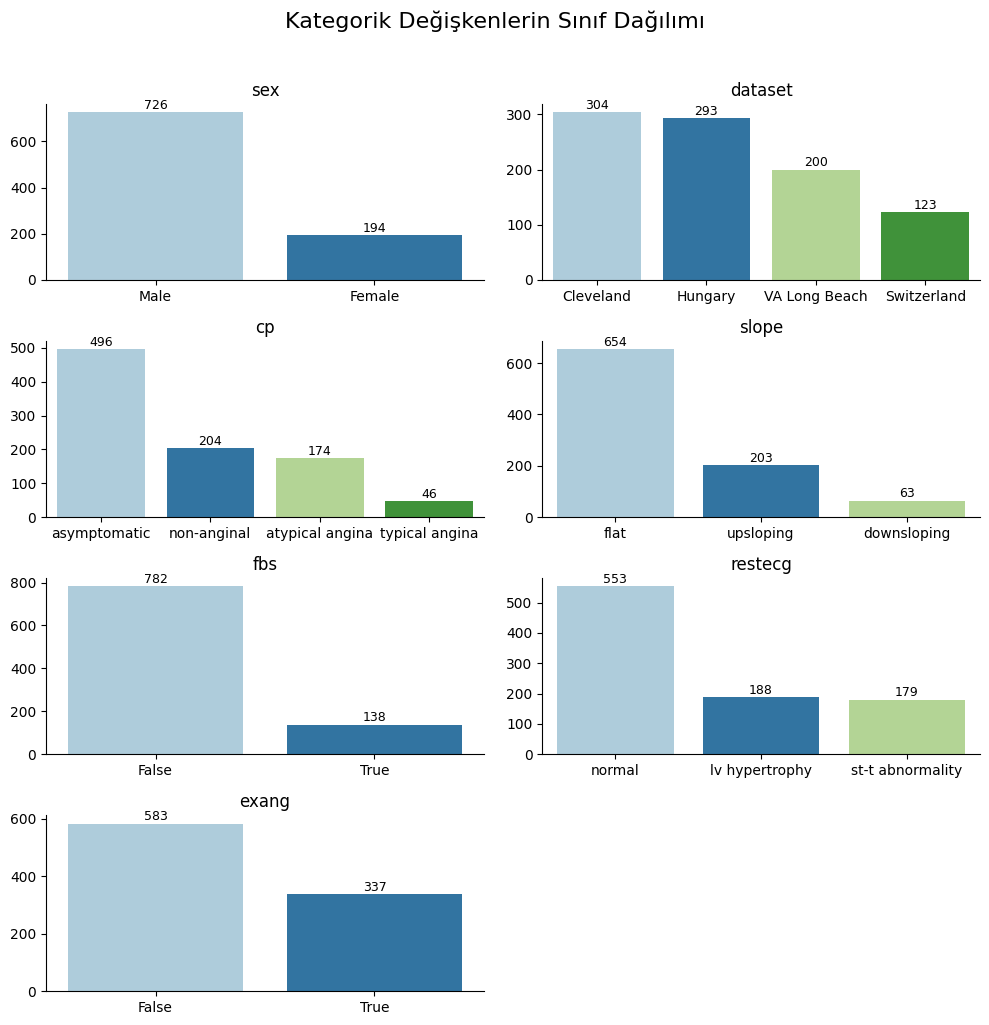

In [ ]:
colors= sns.color_palette("Paired", len(cat_cols2))

fig, axes = plt.subplots(4,2, figsize=(10,10))
axes = axes.flatten()


for i, col in enumerate(cat_cols2):
    sns.countplot(data=df_cleaned, x=col, palette=colors, ax=axes[i], order=df_cleaned[col].value_counts().index)
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    for p in axes[i].patches:
        value = int(p.get_height())
        axes[i].annotate(f'{value}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=9, color='black',
                        xytext=(0, 5), textcoords='offset points')

for j in range(len(cat_cols2.columns), len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.suptitle("Kategorik Değişkenlerin Sınıf Dağılımı", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Bu grafikler, veri setindeki kategorik değişkenlerin gözlem sayısı bakımından nasıl dağıldığını göstermektedir.

- **sex**: Erkek bireylerin veri setinde baskın olduğu görülmektedir. Bu durum, veri setinin toplandığı klinik/epidemiyolojik bağlama bağlı olabilir ve modelleme aşamasında dikkat edilmelidir.
  
- **cp (göğüs ağrısı tipi)**: En yaygın semptom "asymptomatic" olarak kodlanmıştır. Bu bulgu, hastaların çoğunun göğüs ağrısı yaşamasa da kalp hastası olabildiğini göstermektedir. Klinik yorum açısından bu, sessiz iskemi olasılığına işaret eder.

- **slope**, **fbs**, **restecg**, **exang** gibi değişkenlerde de dengesiz dağılımlar gözlemlenmiştir. Bu durum, özellikle dengesiz kategorilere sahip değişkenler için dummy encoding sonrası dikkatli modelleme gerektirir.

- **dataset** değişkeni, farklı merkezlerden gelen veri alt kümelerini temsil eder. Buradaki dengesizlik, hastalık oranlarında merkezler arası farklılıklara da neden olabilir.

Veri dağılımlarının bu şekilde analiz edilmesi, hem ön işleme adımlarında hem de model yorumlamalarında yanlış genellemeleri önlemek açısından oldukça önemlidir.


### Figür: Kategorik Değişkenlerde Kalp Hastalığı (target=1) Oranları

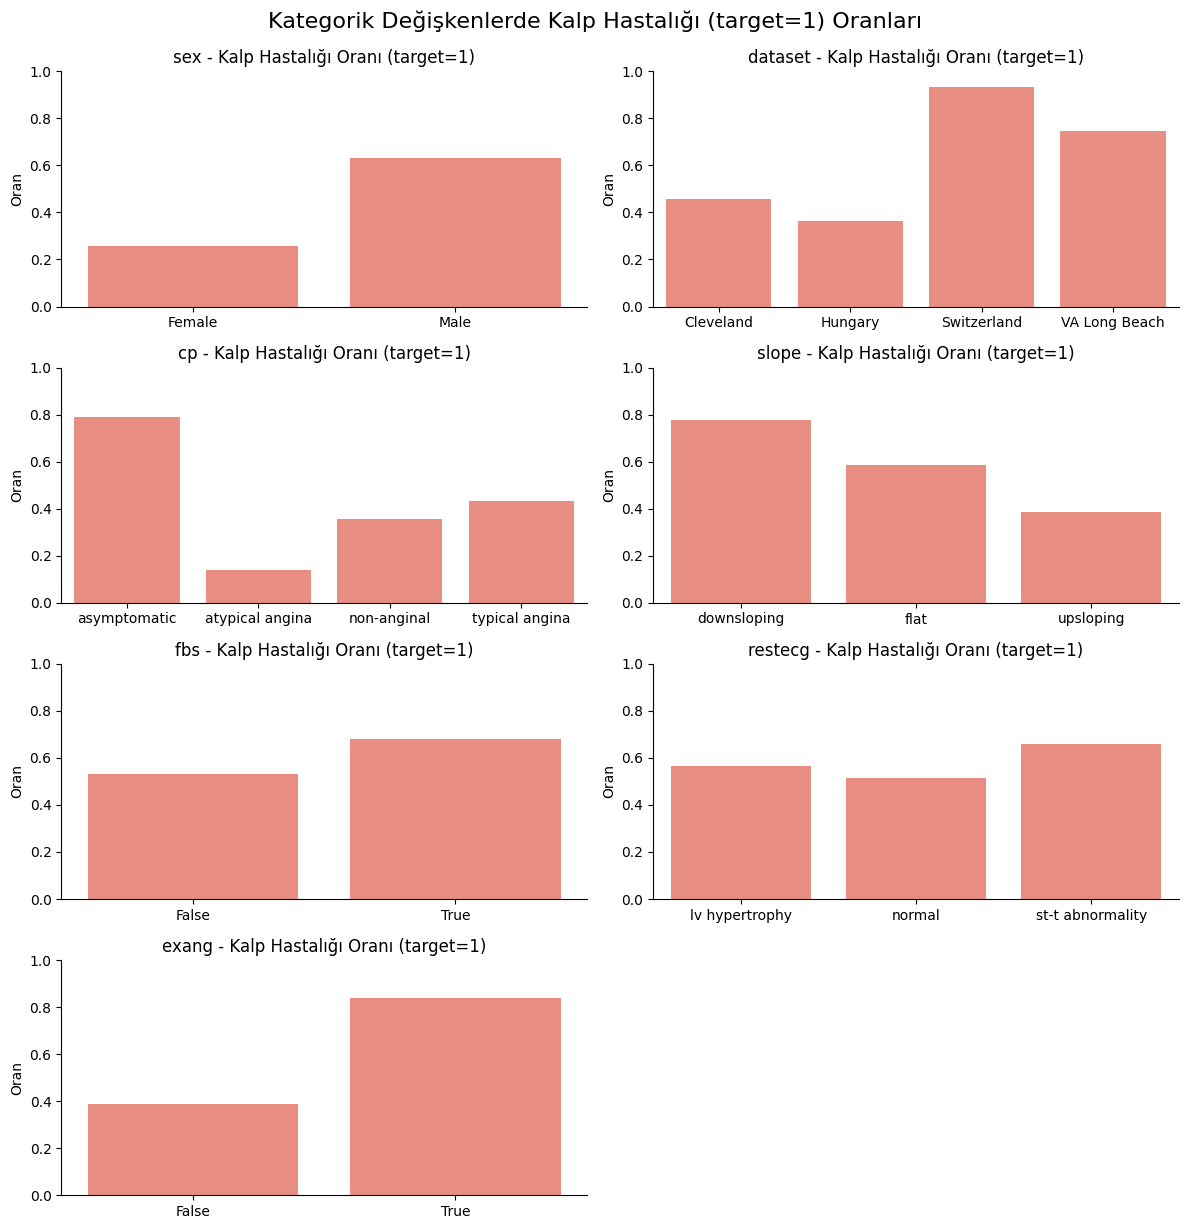

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()

for i, col in enumerate(cat_cols2.columns):
    # target=1 oranını al
    proportions = df_cleaned.groupby(col)['target'].mean()

    sns.barplot(x=proportions.index, y=proportions.values, ax=axes[i], color="salmon")
    axes[i].set_ylim(0, 1)
    axes[i].set_title(f"{col} - Kalp Hastalığı Oranı (target=1)")
    axes[i].set_ylabel("Oran")
    axes[i].set_xlabel("")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Eksikleri sil
for j in range(len(cat_cols2.columns), len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.tight_layout()
plt.suptitle("Kategorik Değişkenlerde Kalp Hastalığı (target=1) Oranları", fontsize=16, y=1.02)
plt.show()


Bu analiz, her kategorik değişkenin sınıfları içinde kalp hastalığı oranlarını (target = 1) karşılaştırmalı olarak sunmaktadır. Klinik bakış açısıyla modelin önemli sinyalleri şunlardır:

- **sex**: Erkek bireylerde kalp hastalığı oranı kadınlara göre daha yüksektir. Bu, kardiyovasküler riskin erkeklerde daha belirgin olduğunu gösteren literatürle uyumludur.

- **cp (göğüs ağrısı tipi)**: "Asymptomatic" sınıfında kalp hastalığı oranı açıkça yüksektir. Bu durum, göğüs ağrısı yaşamayan ama ciddi kardiyovasküler risk taşıyan bireylerin varlığını gösterir ve klinik açıdan sessiz iskemi vakalarına işaret eder.

- **exang (egzersiz anında anjina)**: Egzersiz sırasında anjina yaşayan bireylerde kalp hastalığı oranı çok yüksektir. Bu, efor testi bulgularının önemini vurgular.

- **slope**: "Downsloping" ST segment değişimi gösteren bireylerde kalp hastalığı oranı daha yüksektir. Bu, EKG yorumlamalarında önemli bir bulgudur.

- **dataset**: Verinin geldiği merkeze göre hastalık oranlarında ciddi farklar gözlemlenmiştir. Bu durum, merkeze özgü klinik protokoller veya demografik yapının etkisiyle açıklanabilir.

Bu analiz sayesinde hangi kategorik değişkenlerin kalp hastalığı üzerinde belirgin etkisi olduğu tespit edilmiştir. Bu değişkenler modelin öne çıkan girdileri olarak değerlendirilebilir.


# 5.Veri Ön İşleme

* Kategorik verileri encode et:

  * LabelEncoder (sıralı verilerde)
  * OneHotEncoder (sırasız verilerde)
* Sayısal verileri ölçekle:

  * StandardScaler, MinMaxScaler (özellikle distance-based modeller için)

In [ ]:
print("Temizlenmiş verimizin değişkenleri:\n",df_cleaned.columns)

Temizlenmiş verimizin değişkenleri:
 Index(['age', 'sex', 'dataset', 'cp', 'target', 'trestbps', 'chol', 'thalch',
       'oldpeak', 'slope', 'fbs', 'restecg', 'exang'],
      dtype='object')


In [ ]:
print("Kategorik Değişkenler:\n", cat_cols2.columns)
print("Sayısal Değişkenler:\n", num_cols2.columns)

Kategorik Değişkenler:
 Index(['sex', 'dataset', 'cp', 'slope', 'fbs', 'restecg', 'exang'], dtype='object')
Sayısal Değişkenler:
 Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object')


**Label Encode**

In [ ]:
# Label Encoding uygulanacak sütunlar
label_cols = ['sex', 'fbs', 'exang']

for col in label_cols:
    print(f"--- Label Encoder ÖNCESİ ---")
    print(f"Değişken: '{col}'")
    print("Benzersiz değerler (önce):", df_cleaned[col].unique())

    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

    print(f"\n--- Label Encoder SONRASI ---")
    print(f"Değişken: '{col}'")
    print("Benzersiz değerler (sonra):", df_cleaned[col].unique())
    print("Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
    print("\n" + "-"*50 + "\n")


--- Label Encoder ÖNCESİ ---
Değişken: 'sex'
Benzersiz değerler (önce): ['Male' 'Female']

--- Label Encoder SONRASI ---
Değişken: 'sex'
Benzersiz değerler (sonra): [1 0]
Mapping: {'Female': np.int64(0), 'Male': np.int64(1)}

--------------------------------------------------

--- Label Encoder ÖNCESİ ---
Değişken: 'fbs'
Benzersiz değerler (önce): [True False]

--- Label Encoder SONRASI ---
Değişken: 'fbs'
Benzersiz değerler (sonra): [1 0]
Mapping: {False: np.int64(0), True: np.int64(1)}

--------------------------------------------------

--- Label Encoder ÖNCESİ ---
Değişken: 'exang'
Benzersiz değerler (önce): [False True]

--- Label Encoder SONRASI ---
Değişken: 'exang'
Benzersiz değerler (sonra): [0 1]
Mapping: {False: np.int64(0), True: np.int64(1)}

--------------------------------------------------



**`sex` (Cinsiyet)**

| Önce      | Sonra |
| --------- | ----- |
| 0 (Kadın) | 0     |
| 1 (Erkek) | 1     |

> `sex` sütunu daha önce zaten sayısal olarak 0/1 şeklindeydi, bu yüzden Label Encoder herhangi bir dönüşüm yapmadan mevcut haliyle eşleştirdi.

---

**`fbs` (Açlık Kan Şekeri > 120 mg/dl)**

| Önce  | Sonra |
| ----- | ----- |
| False | 0     |
| True  | 1     |

> `fbs` binary (doğru/yanlış) yapıda olduğu için Label Encoding ile sayısal hale getirildi.

---

**`exang` (Egzersize Bağlı Anjina)**

| Önce  | Sonra |
| ----- | ----- |
| False | 0     |
| True  | 1     |

> `exang` da binary bir sütun olduğundan, doğrudan 0 ve 1 olarak etiketlendi.

---
Modelin sayısal verilerle çalışabilmesi için, sex, fbs ve exang gibi binary değişkenlere Label Encoding uyguladım.
Bu sütunlar zaten iki sınıflı olduğu için, LabelEncoder onları 0 ve 1 olarak sade bir biçimde dönüştürdü. Bu sayede veri formatını korurken modelin bu değişkenleri anlamasını sağladım.

**One Hot Encoding**

In [ ]:
# Encoding öncesi benzersiz değer kontrolü
cols_to_encode = ['dataset', 'cp', 'restecg', 'slope']

print(" --- One-Hot Encoding ÖNCESİ ---")
for col in cols_to_encode:
    print(f"Değişken: '{col}' - Benzersiz Değerler: {df_cleaned[col].unique()}")

# One-Hot Encoding işlemi
df_encoded = pd.get_dummies(df_cleaned, columns=cols_to_encode, drop_first=True)

print("\n --- One-Hot Encoding SONRASI ---")
print("Yeni sütunlar:", [col for col in df_encoded.columns if any(prefix in col for prefix in cols_to_encode)])


 --- One-Hot Encoding ÖNCESİ ---
Değişken: 'dataset' - Benzersiz Değerler: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Değişken: 'cp' - Benzersiz Değerler: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Değişken: 'restecg' - Benzersiz Değerler: ['lv hypertrophy' 'normal' 'st-t abnormality']
Değişken: 'slope' - Benzersiz Değerler: ['downsloping' 'flat' 'upsloping']

 --- One-Hot Encoding SONRASI ---
Yeni sütunlar: ['dataset_Hungary', 'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping']


**Encoding Öncesi Benzersiz Değerler:**

| Değişken  | Sınıflar                                                   |
| --------- | ---------------------------------------------------------- |
| `dataset` | Cleveland, Hungary, Switzerland, VA Long Beach             |
| `cp`      | typical angina, asymptomatic, non-anginal, atypical angina |
| `restecg` | lv hypertrophy, normal, st-t abnormality                   |
| `slope`   | downsloping, flat, upsloping                               |

**Encoding Sonrası Oluşan Yeni Sütunlar:**

```text
['dataset_Hungary',
 'dataset_Switzerland',
 'dataset_VA Long Beach',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'restecg_normal',
 'restecg_st-t abnormality',
 'slope_flat',
 'slope_upsloping']
```

> `drop_first=True` parametresi ile her kategorik değişkende **bir sınıf referans olarak düşürülmüş** ve böylece **çoklu doğrusal bağlantı (multicollinearity)** riski azaltılmıştır.

---
> “`cp`, `slope`, `dataset` ve `restecg` gibi sıralı anlam taşımayan kategorik değişkenlerde one-hot encoding uyguladım. Böylece model bu değişkenleri eşit mesafede ve karşılaştırılabilir olarak ele alabiliyor.
> Ayrıca `drop_first=True` parametresi ile referans sınıfı bırakarak fazladan bilgi tekrarının önüne geçtim.”




**StandardScaler**

In [ ]:
# Ölçeklenecek sayısal sütunlar
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

print(" Sayısal değişkenler ölçeklendi.")

 Sayısal değişkenler ölçeklendi.



| Değişken   | Açıklama                                   |
| ---------- | ------------------------------------------ |
| `age`      | Hastanın yaşı                              |
| `trestbps` | Dinlenme kan basıncı                       |
| `chol`     | Serum kolesterol düzeyi                    |
| `thalch`   | Egzersiz sırasında ulaşılan maksimum nabız |
| `oldpeak`  | ST depresyonu                              |

----


* Kullanılan yöntem: **StandardScaler**
* Formül: (x - ortalama) / standart sapma
* Her değişken, ortalaması 0 ve standart sapması 1 olacak şekilde yeniden ölçeklendirildi.

----


> Sayısal değişkenlerin farklı ölçeklerde olması modelin öğrenmesini zorlaştırabileceği için, özellikle regresyon ve mesafe tabanlı algoritmalarda yaygın kullanılan StandardScaler yöntemini tercih ettim. Bu yöntemle her değişkenin dağılımını normalize ederek modelin her özelliğe eşit mesafede yaklaşmasını sağladım.

In [ ]:
print("Modelleme öncesi verimiz böyle:\n")
display(df_cleaned.head().T)
print("\n")
print("Modelleme sonrası verimiz böyle:\n")
display(df_encoded.head().T)

Modelleme öncesi verimiz böyle:



,0,1,2,3,4
age,63,67,67,37,41
sex,1,1,1,1,0
dataset,Cleveland,Cleveland,Cleveland,Cleveland,Cleveland
cp,typical angina,asymptomatic,asymptomatic,non-anginal,atypical angina
target,0,1,1,0,0
trestbps,145.0,160.0,120.0,130.0,130.0
chol,233.0,286.0,229.0,250.0,204.0
thalch,150.0,108.0,129.0,187.0,172.0
oldpeak,2.3,1.5,2.6,3.5,1.4
slope,downsloping,flat,flat,downsloping,upsloping




Modelleme sonrası verimiz böyle:



,0,1,2,3,4
age,1.007386,1.432034,1.432034,-1.752828,-1.32818
sex,1,1,1,1,0
target,0,1,1,0,0
trestbps,0.903911,1.864748,-0.697484,-0.056926,-0.056926
chol,0.285405,0.858419,0.242158,0.469201,-0.028131
thalch,0.485469,-1.172119,-0.343325,1.945726,1.35373
oldpeak,1.54997,0.710511,1.864767,2.809158,0.605578
fbs,1,0,0,0,0
exang,0,1,1,0,0
dataset_Hungary,False,False,False,False,False


In [ ]:
print("Modelleme öncesi verimiz böyle:\n")
display(df_cleaned.describe().T)
print("\n")
print("Modelleme sonrası verimiz böyle:\n")
display(df_encoded.describe().T)

Modelleme öncesi verimiz böyle:



,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.000,47.0,54.0,60.00,77.000
sex,920.0,0.789130,0.408148,0.000,1.0,1.0,1.00,1.000
target,920.0,0.553261,0.497426,0.000,0.0,1.0,1.00,1.000
trestbps,920.0,130.888693,15.619884,92.000,120.0,130.0,140.00,170.000
chol,920.0,206.601974,92.543684,41.625,177.0,223.0,267.25,402.625
thalch,920.0,137.699171,25.351797,60.000,120.0,140.0,156.40,202.000
oldpeak,920.0,0.822887,0.953513,-2.000,0.0,0.6,1.50,3.700
fbs,920.0,0.150000,0.357266,0.000,0.0,0.0,0.00,1.000
exang,920.0,0.366304,0.482056,0.000,0.0,0.0,1.00,1.000




Modelleme sonrası verimiz böyle:



,count,mean,std,min,25%,50%,75%,max
age,920.0,6.178632e-17,1.000544,-2.708286,-0.691207,0.051927,0.688899,2.493654
sex,920.0,7.891304e-01,0.408148,0.000000,1.000000,1.000000,1.000000,1.000000
target,920.0,5.532609e-01,0.497426,0.000000,0.000000,1.000000,1.000000,1.000000
trestbps,920.0,-3.475481e-16,1.000544,-2.491046,-0.697484,-0.056926,0.583632,2.505305
chol,920.0,1.235726e-16,1.000544,-1.783663,-0.320044,0.177289,0.655701,2.119320
thalch,920.0,4.325043e-16,1.000544,-3.066506,-0.698522,0.090805,0.738054,2.537722
oldpeak,920.0,9.267949e-17,1.000544,-2.962123,-0.863475,-0.233881,0.710511,3.019023
fbs,920.0,1.500000e-01,0.357266,0.000000,0.000000,0.000000,0.000000,1.000000
exang,920.0,3.663043e-01,0.482056,0.000000,0.000000,0.000000,1.000000,1.000000


Modelleme Öncesi ve Sonrası Veri Karşılaştırması

Aşağıdaki tabloda, veride modelleme öncesi ve sonrasında yapılan işlemlerin etkisi açıkça görülüyor:

| Özellik    | Modelleme Öncesi (mean ± std) | Modelleme Sonrası (mean ± std) | Açıklama                             |
| ---------- | ----------------------------- | ------------------------------ | ------------------------------------ |
| `age`      | 53.5 ± 9.42                   | \~0 ± 1.00                     | StandardScaler uygulandı             |
| `trestbps` | 130.9 ± 15.62                 | \~0 ± 1.00                     | StandardScaler uygulandı             |
| `chol`     | 206.6 ± 92.54                 | \~0 ± 1.00                     | StandardScaler uygulandı             |
| `thalch`   | 137.7 ± 25.35                 | \~0 ± 1.00                     | StandardScaler uygulandı             |
| `oldpeak`  | 0.82 ± 0.95                   | \~0 ± 1.00                     | StandardScaler uygulandı             |
| `sex`      | 0.79 ± 0.41                   | Aynı kaldı (Label encoded)     | Binary olduğu için scaling gerekmedi |
| `fbs`      | 0.15 ± 0.36                   | Aynı kaldı (Label encoded)     | Binary                               |
| `exang`    | 0.37 ± 0.48                   | Aynı kaldı (Label encoded)     | Binary                               |
| `target`   | 0.55 ± 0.50                   | Aynı (değiştirilmedi)          | Hedef değişken                       |

---

* Sayısal sütunların hepsi **başarıyla normalize edildi** (ortalama ≈ 0, std ≈ 1).
* Binary değişkenler (`sex`, `fbs`, `exang`) zaten 0–1 formatında olduğundan scaling'e gerek kalmadı.
* `target` sütunu (yani modelin tahmin etmeye çalıştığı değişken) olduğu gibi bırakıldı.

---

 Modellemeye geçmeden önce verinin son halini tek tek kontrol ettim. Sayısal değişkenlerde standardizasyon (scaling) işlemi yaparak hepsini aynı ölçeğe getirdim. Böylece modelin bazı değişkenleri diğerlerinden daha “önemliymiş” gibi algılamasının önüne geçtim.

`sex`, `fbs` ve `exang` gibi zaten binary olan sütunlar label encoding ile sayısallaştırıldığı için onlara scaling uygulamama gerek kalmadı.

 Sonuç olarak tüm verim hem mantıklı hem de makine öğrenmesine uygun bir forma dönüştü.




### Figür: Özelliklerin Standart Sapmalarındaki Değişim (StandardScaler Uygulaması)

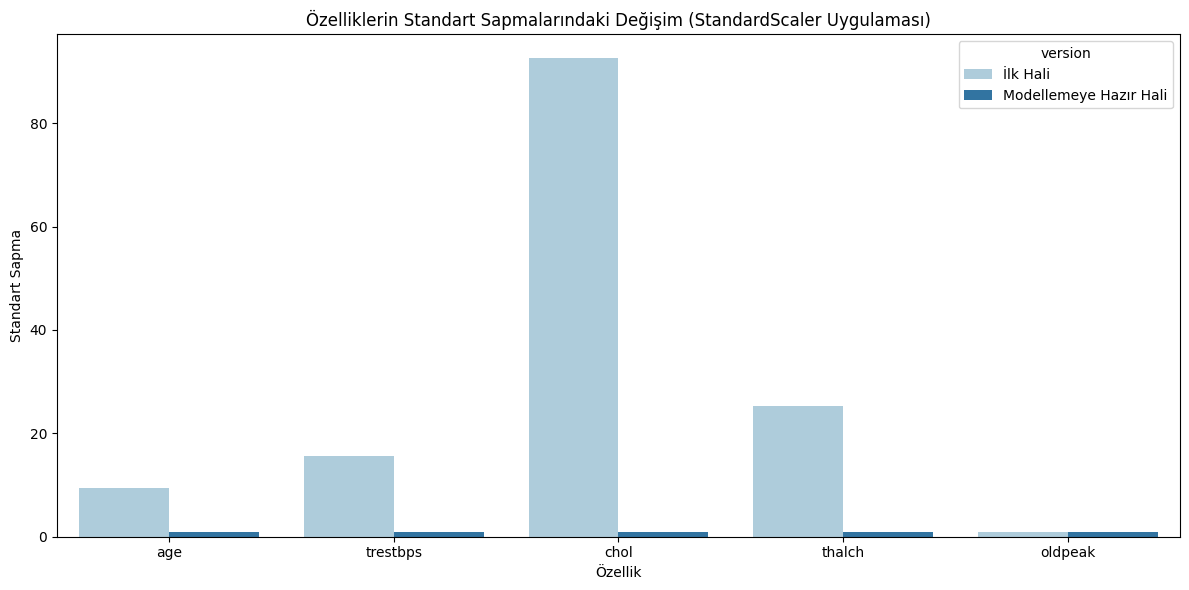

In [ ]:
# 1. Verinin ilk haline ait describe() çıktısına göre standart sapmalar
first_desc = {
    'age': {'std': 9.42},
    'trestbps': {'std': 15.62},
    'chol': {'std': 92.54},
    'thalch': {'std': 25.35},
    'oldpeak': {'std': 0.95}
}

# 2. StandardScaler sonrası veriye ait describe() çıktısına göre standart sapmalar
scaled_desc = {
    'age': {'std': 1.00},
    'trestbps': {'std': 1.00},
    'chol': {'std': 1.00},
    'thalch': {'std': 1.00},
    'oldpeak': {'std': 1.00}
}

# 3. DataFrame oluştur
initial_df = pd.DataFrame(first_desc).T
initial_df['version'] = 'İlk Hali'

scaled_df = pd.DataFrame(scaled_desc).T
scaled_df['version'] = 'Modellemeye Hazır Hali'

# 4. Birleştir
combined_df = pd.concat([initial_df, scaled_df]).reset_index().rename(columns={'index': 'feature'})

# 5. Görselleştir
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_df, x='feature', y='std', hue='version', palette='Paired')
plt.title('Özelliklerin Standart Sapmalarındaki Değişim (StandardScaler Uygulaması)')
plt.ylabel('Standart Sapma')
plt.xlabel('Özellik')
plt.tight_layout()
plt.show()

* `chol`, `thalch`, `trestbps` gibi bazı değişkenlerde standart sapma **çok yüksek** olduğu için bu değişkenler model üzerinde baskın hale gelebilirdi.
* StandardScaler uygulandıktan sonra tüm değişkenlerin dağılımları normalize edildi (**std ≈ 1**), böylece model her değişkene eşit hassasiyetle yaklaşabilecek hale geldi.
---

* Bu grafikte gördüğümüz gibi, veri setimde bazı sayısal değişkenlerin standart sapmaları oldukça farklıydı. Bu farklar modelin öğrenmesini olumsuz etkileyebileceği için StandardScaler kullandım.
* Sonuç olarak, tüm değişkenleri aynı ölçeğe çekerek modeli daha dengeli ve doğru öğrenebilecek bir yapıya ulaştırdım.


### Figür: StandardScaler Uygulaması: Dağılım Üzerindeki Etkisi

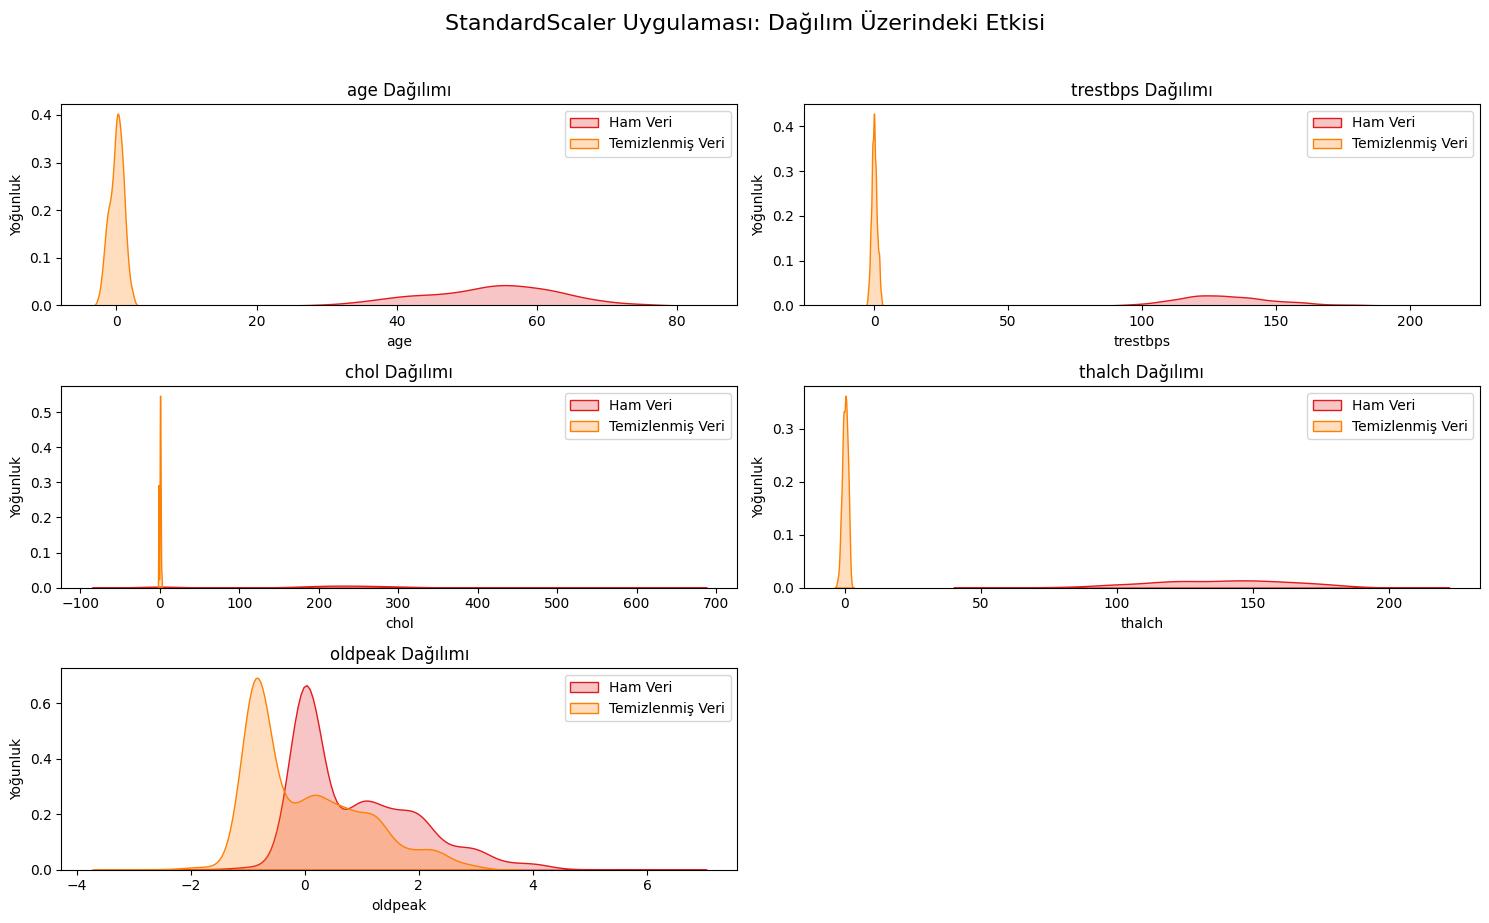

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.kdeplot(df[col].dropna(), ax=axes[i], fill=True, label="Ham Veri", color="#e31a1c")
    sns.kdeplot(df_encoded[col].dropna(), ax=axes[i], fill=True, label="Temizlenmiş Veri", color="#ff7f00")
    axes[i].set_title(f"{col} Dağılımı")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Yoğunluk")
    axes[i].legend()

# Eğer 6. subplot boş kalıyorsa sil
if len(num_cols) < len(axes):
    for j in range(len(num_cols), len(axes)):
        fig.delaxes(axes[j])


plt.suptitle("StandardScaler Uygulaması: Dağılım Üzerindeki Etkisi", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

* Ölçekleme sonrası veriler **ortalama ≈ 0** ve **standart sapma ≈ 1** olacak şekilde yeniden merkezlenmiştir.
* Özellikle `chol`, `thalch` ve `trestbps` gibi değişkenlerin dağılımı ham hâlde çok geniş aralıklara yayılmışken, temizlenmiş veride bu dağılım standart bir forma oturmuştur.
* `oldpeak` değişkeninde bile dağılım sıkılaşarak modele daha uygun hale gelmiştir.

> Bu karşılaştırma, **veri standardizasyonunun sadece matematiksel değil, dağılımsal olarak da etkili olduğunu** görsel olarak ortaya koymaktadır.

---

* Bu grafikte, sayısal değişkenlerin ölçekleme öncesi ve sonrası dağılımını karşılaştırdım. StandardScaler uygulamasıyla birlikte veriler normalize edildiği için artık her değişkenin ortalaması sıfıra yakın, standart sapması ise bire yakın hale geldi.
* Bu sayede model, farklı büyüklükteki sayısal değerlerden etkilenmeden öğrenme yapabilecek.



### Figür: Target ile Korelasyonu Yüksek Özellikler

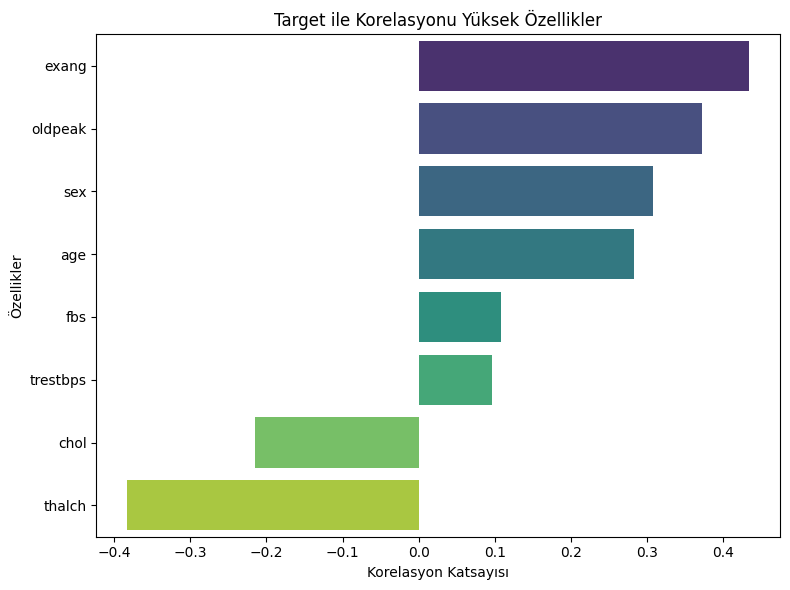

In [ ]:
numeric_df = df_encoded.select_dtypes(include='number')

# Korelasyon matrisini hesapla
corr_matrix = numeric_df.corr()

# Target ile olan korelasyonları çek
target_corr = corr_matrix['target'].drop('target').sort_values(ascending=False)

# Görselleştir
plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='viridis')
plt.title('Target ile Korelasyonu Yüksek Özellikler')
plt.xlabel('Korelasyon Katsayısı')
plt.ylabel('Özellikler')
plt.tight_layout()
plt.show()


##  Target ile Korelasyonu Yüksek Özellikler:

### En yüksek pozitif korelasyona sahip değişkenler:

1. **`exang` (Egzersize bağlı anjina):** **+0.45**

   * Egzersize bağlı anjina varsa (exang = 1), kalp hastalığı olma ihtimali artıyor gibi gözüküyor.
2. **`oldpeak` (ST depresyonu):** **+0.4 civarı**

   * ST depresyonu arttıkça hastalık olasılığı da artıyor → beklenen bir sonuç.
3. **`sex` (Cinsiyet):** Yaklaşık **+0.3**

   * Erkeklerde kalp hastalığı riski daha yüksek olabilir
---

### 🔹 Negatif korelasyonlar:

1. **`thalch` (Maksimum kalp atım hızı):** **-0.4 civarı**

   * Maksimum kalp atım hızı yüksek olan bireylerde hastalık riski daha düşük olabilir. Bu da **sağlıklı kalp fonksiyonları**yla ilişkili olabilir.
2. **`chol` (Kolesterol):** **-0.2 civarı**

   * Kolesterol düzeyi arttıkça hastalık riski azalmış görünüyor, bu veride **nonlinear** ilişki veya **başka faktörlerle maskelenme** olabilir.

---

### Nötr veya düşük etkili değişkenler:

* **`fbs`, `trestbps`, `age`** gibi değişkenler korelasyon açısından daha zayıf (0.1 civarı).

  * Ama bu özelliklerin önemini değerlendirmek için mutlaka **feature importance** veya **SHAP** gibi yöntemlere de bakmak gerekir.

---

* Veride **en güçlü belirleyiciler** olarak `exang`, `oldpeak`, `thalch` öne çıkıyor.


### Figür: Egzersize Bağlı Anjina (exang) ile Kalp Hastalığı İlişkisi

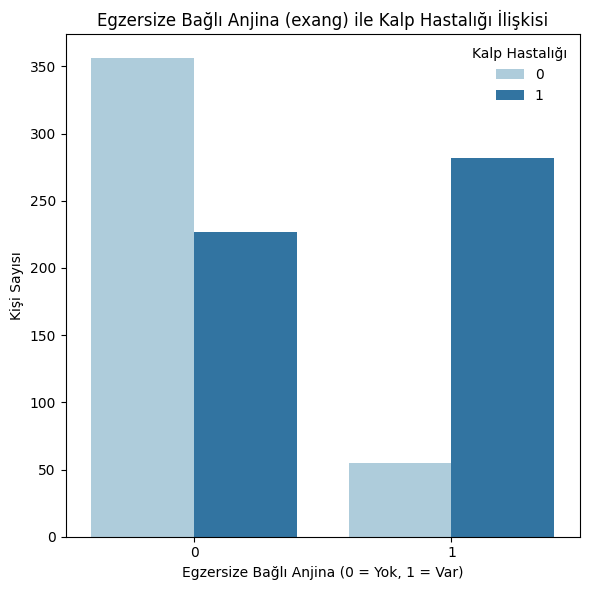

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_encoded, x='exang', hue='target', palette='Paired')
plt.title("Egzersize Bağlı Anjina (exang) ile Kalp Hastalığı İlişkisi")
plt.xlabel("Egzersize Bağlı Anjina (0 = Yok, 1 = Var)")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Kalp Hastalığı", frameon=False)
plt.tight_layout()
plt.show()


exang = 1 (anjina var) olanlarda kalp hastalığı (target = 1) olasılığı ciddi şekilde artıyor.

exang = 0 (anjina yok) olanlarda ise daha çok hastalık yok (target = 0).

Egzersize bağlı göğüs ağrısı yaşayan bireylerde kalp hastalığı riski oldukça artıyor.

### Figür: ST Depresyonu (oldpeak) ile Kalp Hastalığı İlişkisi

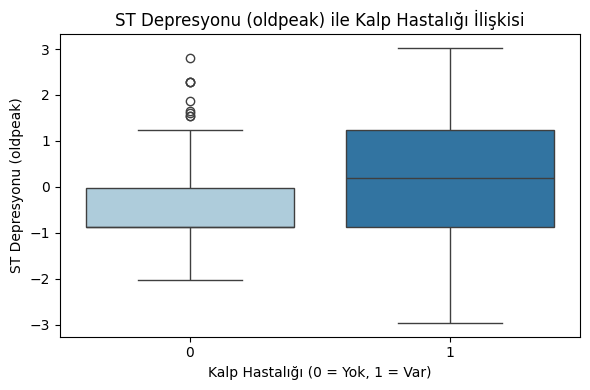

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_encoded, x='target', y='oldpeak', palette='Paired')
plt.title("ST Depresyonu (oldpeak) ile Kalp Hastalığı İlişkisi")
plt.xlabel("Kalp Hastalığı (0 = Yok, 1 = Var)")
plt.ylabel("ST Depresyonu (oldpeak)")
plt.tight_layout()
plt.show()

Hastalık olmayan bireylerin oldpeak değerleri çok düşük. Medyanları yaklaşık 0 civarında.

Hastalık olan bireylerde oldpeak değeri genelde daha yüksek ve dağılımı daha geniş.

ST depresyonu arttıkça kalp rahatsızlığı olasılığı da ciddi oranda artıyor.

oldpeak, kalp hastalığı için oldukça anlamlı bir biyobelirteç. Medyan ve dağılım farkı çok net.



### Figür: Maksimum Kalp Atış Hızı (thalch) ile Kalp Hastalığı İlişkisi

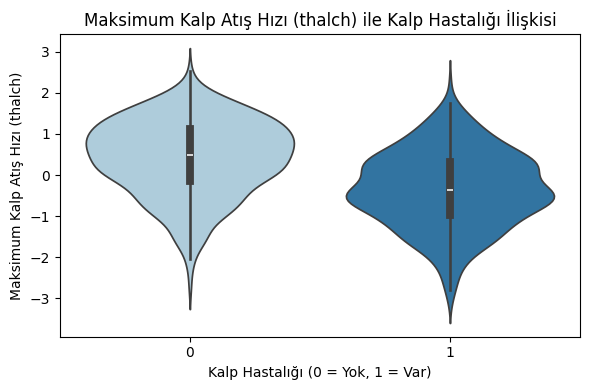

In [ ]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_encoded, x='target', y='thalch', palette='Paired')
plt.title("Maksimum Kalp Atış Hızı (thalch) ile Kalp Hastalığı İlişkisi")
plt.xlabel("Kalp Hastalığı (0 = Yok, 1 = Var)")
plt.ylabel("Maksimum Kalp Atış Hızı (thalch)")
plt.tight_layout()
plt.show()


Kalp hastalığı olmayan bireylerde (0) thalch değeri genellikle daha yüksek → kalp fonksiyonu daha güçlü.

Kalp hastalığı olan bireylerde (1) dağılım aşağıya doğru kaymış, medyan daha düşük.

Dağılım şekilleri arasındaki fark, hastalık ile thalch arasında güçlü negatif bir ilişki olduğunu ortaya koyuyor.

Yüksek kalp atım hızı genellikle daha sağlıklı bir kalbi işaret ediyor olabilir. Bu değişkenin de ROC analizde çok yüksek AUC vermesi beklenir.

### Figür: Kalp Hastalığı ve Cinsiyet


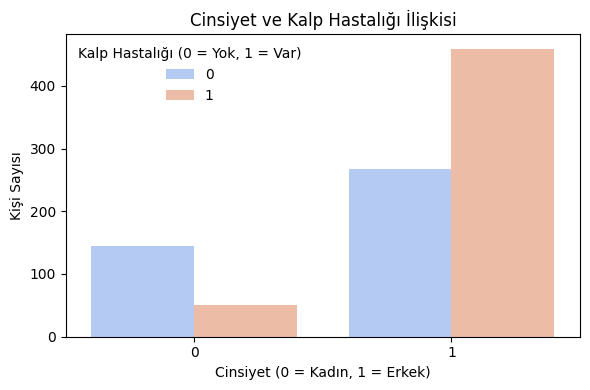

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_encoded, x='sex', hue='target', palette='coolwarm')
plt.title("Cinsiyet ve Kalp Hastalığı İlişkisi")
plt.xlabel("Cinsiyet (0 = Kadın, 1 = Erkek)")
plt.ylabel("Kişi Sayısı")
plt.legend(title="Kalp Hastalığı (0 = Yok, 1 = Var)", frameon= False)
plt.tight_layout()
plt.show()


sex = 1 olanlarda (erkekler):

Kalp hastalığı (target = 1) sayısı genelde daha yüksek çıkar.

sex = 0 olanlarda (kadınlar):

Kalp hastalığı riski daha düşük görünebilir.

### Figür: Yaş ve Kalp Krizi

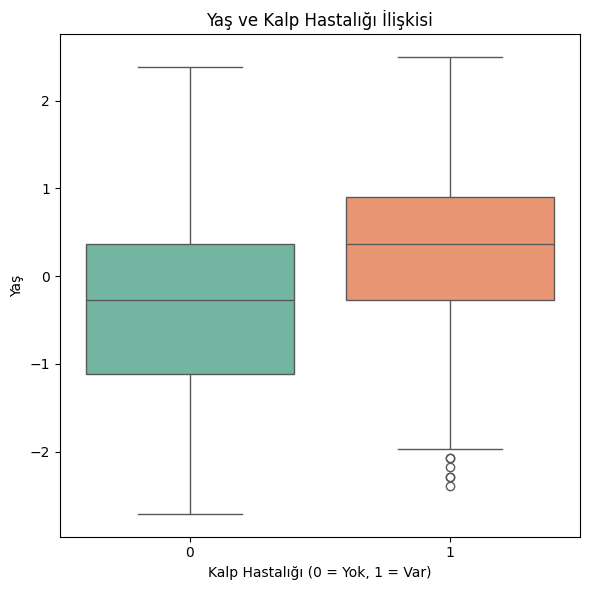

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df_encoded, x='target', y='age', palette='Set2')
plt.title("Yaş ve Kalp Hastalığı İlişkisi")
plt.xlabel("Kalp Hastalığı (0 = Yok, 1 = Var)")
plt.ylabel("Yaş")
plt.tight_layout()
plt.show()


Yaş arttıkça kalp hastalığı riski artıyor diyebiliriz.
Ancak yaş tek başına yeterli değil — özellikle genç yaşta hastalık yaşayan bireyler de var, bu da çok değişkenli modelleme ihtiyacını gösteriyor.


In [ ]:
# Yaş gruplarına ayırma
df_cleaned['age_group'] = pd.cut(
    df_cleaned['age'],
    bins=[25, 40, 50, 60, 70, 80],
    labels=['25-40', '41-50', '51-60', '61-70', '71-80'],
    right=False
)

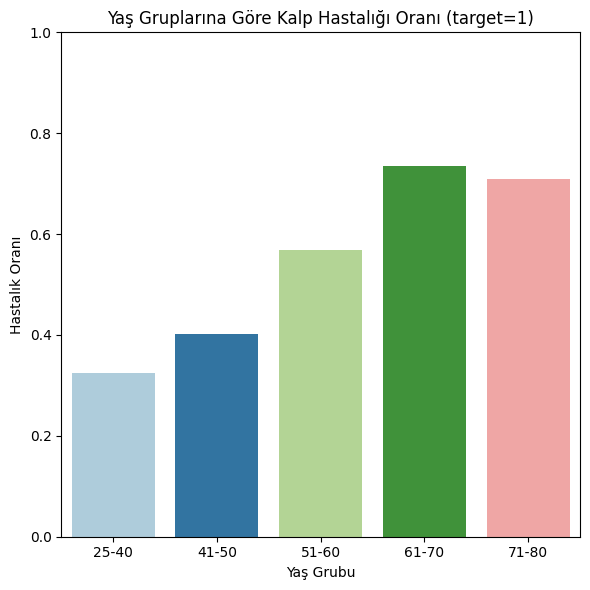

In [ ]:
age_group_stats = df_cleaned.groupby('age_group')['target'].mean().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(data=age_group_stats, x='age_group', y='target', palette='Paired')
plt.title('Yaş Gruplarına Göre Kalp Hastalığı Oranı (target=1)')
plt.ylabel('Hastalık Oranı')
plt.xlabel('Yaş Grubu')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


Yaş ilerledikçe kalp hastalığı oranı dikkat çekici şekilde artmaktadır.
Özellikle 61-70 yaş grubunda bu oran %73'e kadar çıkmakta, 51 yaş üstü bireylerde genel eğilim yukarı yönlüdür. Bu bulgu klinik açıdan da beklenen bir durumdur çünkü yaş, kardiyovasküler hastalıklar için en güçlü risk faktörlerinden biridir.

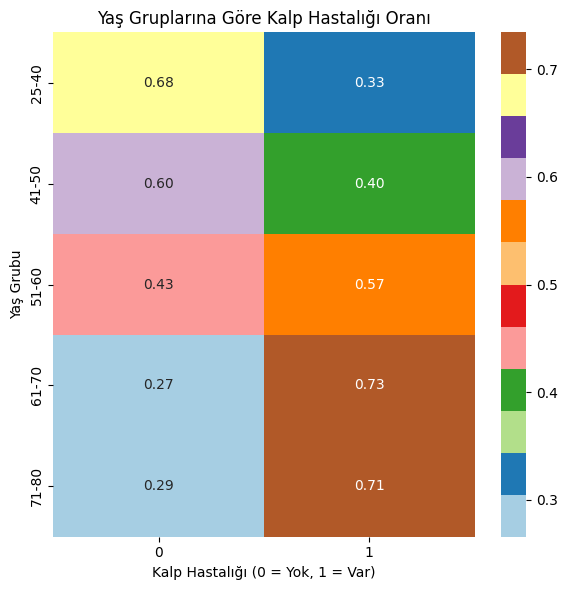

In [ ]:
# Her yaş grubunun kalp hastalığına sahip olup olmama oranlarını gösteren oran tablosu
age_group_rate = pd.crosstab(df_cleaned['age_group'], df_cleaned['target'], normalize='index')

plt.figure(figsize=(6, 6))
sns.heatmap(age_group_rate, annot=True, cmap='Paired', fmt='.2f')
plt.title("Yaş Gruplarına Göre Kalp Hastalığı Oranı")
plt.xlabel("Kalp Hastalığı (0 = Yok, 1 = Var)")
plt.ylabel("Yaş Grubu")
plt.tight_layout()
plt.show()



| Yaş Grubu | Kalp Hastalığı Yok (%) | Kalp Hastalığı Var (%) | Yorum                                                |
| --------- | ---------------------- | ---------------------- | ---------------------------------------------------- |
| 25–40     | %68                    | %32                    | Gençlerde hastalık oranı düşük. Koruyucu etki güçlü. |
| 41–50     | %60                    | %40                    | Risk artmaya başlıyor.                               |
| 51–60     | %43                    | %57                    | Eşik yaş grubu → **riskli bölge**ye giriliyor.       |
| 61–70     | %27                    | %73                    | **En riskli yaş grubu**, hastalık oranı zirvede.     |
| 71–80     | %29                    | %71                    | Risk hâlâ çok yüksek ama artış yavaşlamış.           |


---


* **Yaş arttıkça kalp hastalığı riski belirgin şekilde artmaktadır.**
* Özellikle **50 yaş sonrası** bireylerde durum dramatik şekilde değişmektedir:

  * Sağlıklı birey oranı azalırken, hastalık oranı artıyor.
  * **60 yaş üstü bireylerde** kalp hastalığı oranı %70'in üzerine çıkıyor.
* Bu tablo, medikal literatürle uyumludur: yaş, kardiyovasküler risk faktörleri içinde **en güçlü belirleyicilerden biridir.**

---

* **25–40 yaş arası bireylerde** kalp hastalığı oranı %33 civarındayken, sağlıklı birey oranı %68.
* **61–70 ve 71–80 yaş gruplarında** kalp hastalığı oranı sırasıyla %73 ve %71.
* Bu, yaşla birlikte **prevalansın hızla yükseldiğini** ve modellemede yaş değişkenine mutlaka öncelik verilmesi gerektiğini göstermektedir.


# **6. Modelleme**

In [ ]:

print("\n--- Train/Test Ayrımı ÖNCESİ ---")
print(f"Veri seti şekli: {df_encoded.shape}")

# Özellik ve hedef ayrımı
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

print("\n--- Train/Test Ayrımı UYGULANIYOR ---")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Veri %80 eğitim, %20 test olarak ayrıldı.")
print("\n--- Train/Test Ayrımı SONRASI ---")
print(f"X_train şekli: {X_train.shape}")
print(f"X_test şekli:  {X_test.shape}")
print(
    f"y_train sınıf dağılımı:\n{y_train.value_counts(normalize=True).round(2)}"
)
print(f"y_test  sınıf dağılımı:\n{y_test.value_counts(normalize=True).round(2)}")




--- Train/Test Ayrımı ÖNCESİ ---
Veri seti şekli: (920, 19)

--- Train/Test Ayrımı UYGULANIYOR ---
Veri %80 eğitim, %20 test olarak ayrıldı.

--- Train/Test Ayrımı SONRASI ---
X_train şekli: (736, 18)
X_test şekli:  (184, 18)
y_train sınıf dağılımı:
target
1    0.55
0    0.45
Name: proportion, dtype: float64
y_test  sınıf dağılımı:
target
1    0.55
0    0.45
Name: proportion, dtype: float64


**Medikal Modelleme Metrikleri***

**Recall (Duyarlılık / True Positive Rate)**
- **Tanım:** Gerçek hasta olan bireylerin ne kadarının doğru tespit edildiğini gösterir.
- **Önemi:** Kalp hastalığı gibi ciddi rahatsızlıklarda, hastalığı olan bir kişiyi sağlıklı olarak sınıflandırmak (False Negative) hayati riskler taşıyabilir. Bu nedenle, *recall* medikal projelerde **birincil önceliğe** sahiptir.

**Precision (Kesinlik)**
- **Tanım:** Modelin hasta dediği bireylerin gerçekten hasta olma oranıdır.
- **Önemi:** Yanlış alarm sayısını azaltmak (False Positive), gereksiz test ve maliyetleri önlemek için önemlidir. Ancak, recall kadar kritik değildir.

**F1-Score**
- **Tanım:** Precision ve Recall dengesini ölçen harmonik ortalamadır.
- **Önemi:** Özellikle sınıf dağılımı dengesiz olan durumlarda modelin genel başarısını özetlemek için idealdir.

**ROC-AUC**
- **Tanım:** Modelin pozitif ve negatif sınıfları ayırt etme yeteneğini ölçer.
- **Önemi:** Tüm sınıflandırma eşiklerini göz önüne alarak genel performansı değerlendirmeye yarar. AUC değeri 1'e yaklaştıkça modelin güvenilirliği artar.

> **Özetle:** Bu projede hedeflenen şey, kalp hastalığı olan bireyleri kaçırmamak olduğu için **recall** ön planda tutulmalı; fakat precision, F1-score ve ROC-AUC değerleriyle birlikte dengeli bir değerlendirme yapılmalıdır.


In [ ]:
# Tüm modelleri tanımla
model_list = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        use_label_encoder=False, eval_metric="logloss", random_state=42
    ),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
}



--- Logistic Regression Modeli Eğitiliyor ve Değerlendiriliyor ---


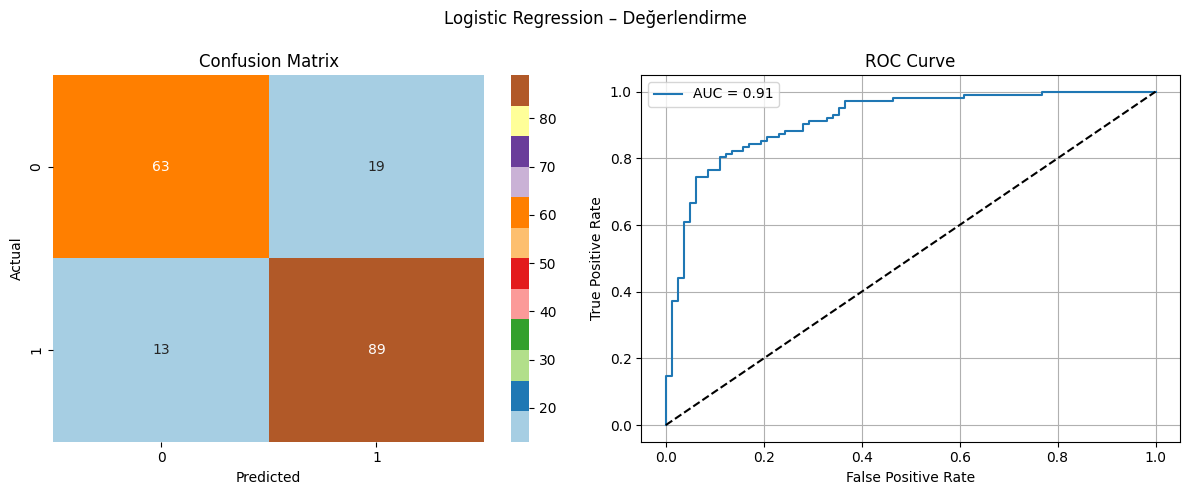


--- Random Forest Modeli Eğitiliyor ve Değerlendiriliyor ---


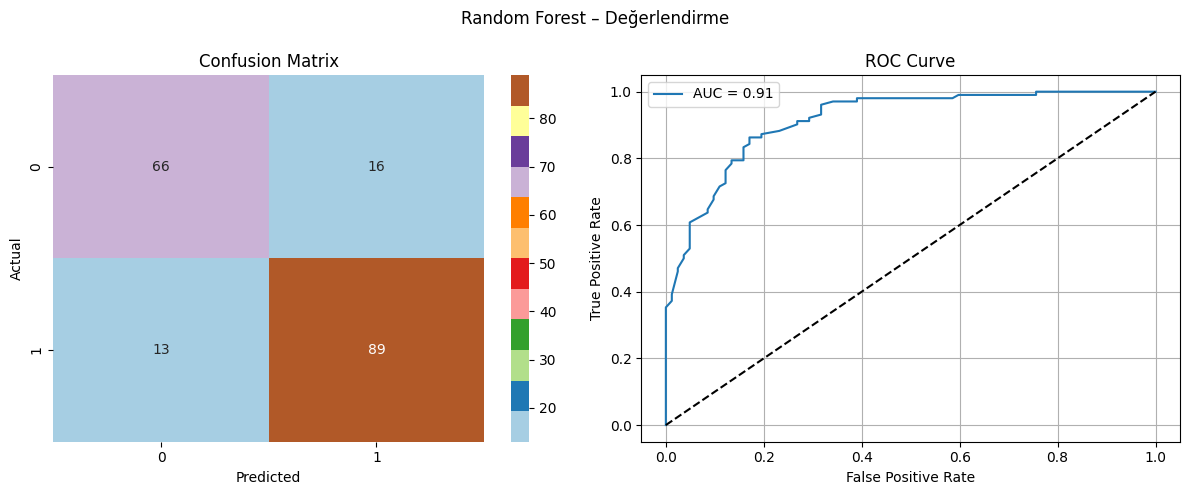


--- KNN Modeli Eğitiliyor ve Değerlendiriliyor ---


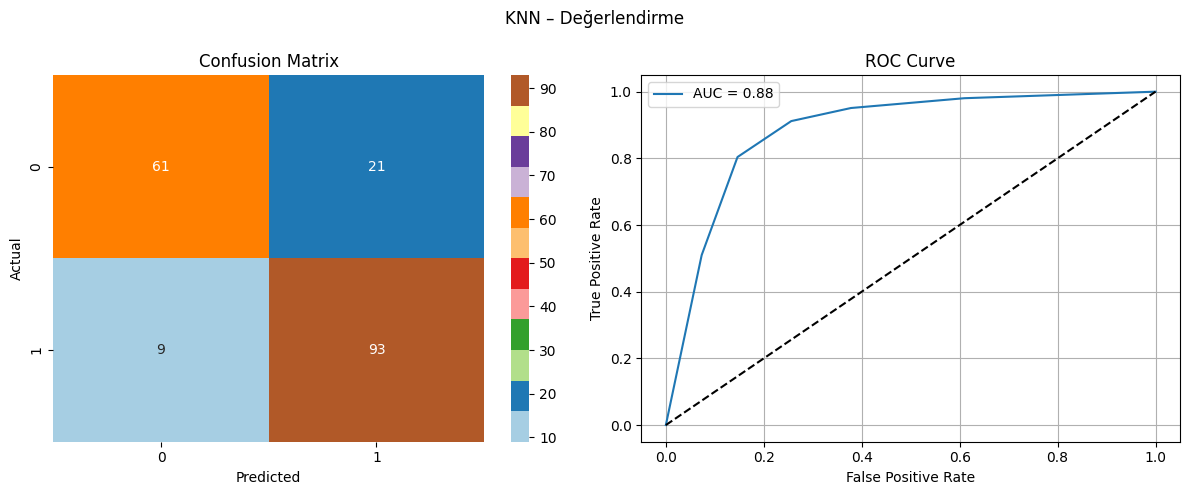


--- SVM Modeli Eğitiliyor ve Değerlendiriliyor ---


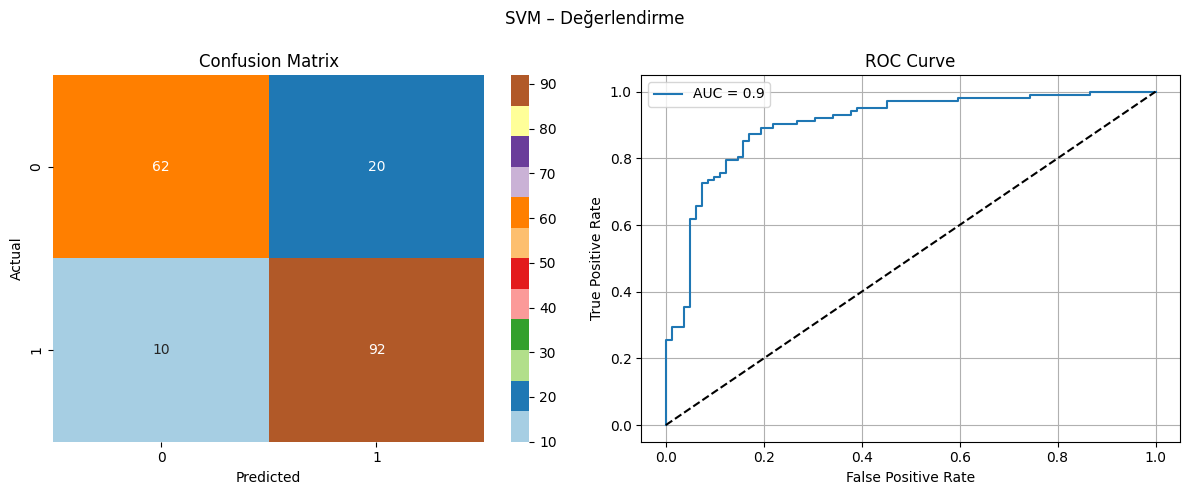


--- XGBoost Modeli Eğitiliyor ve Değerlendiriliyor ---


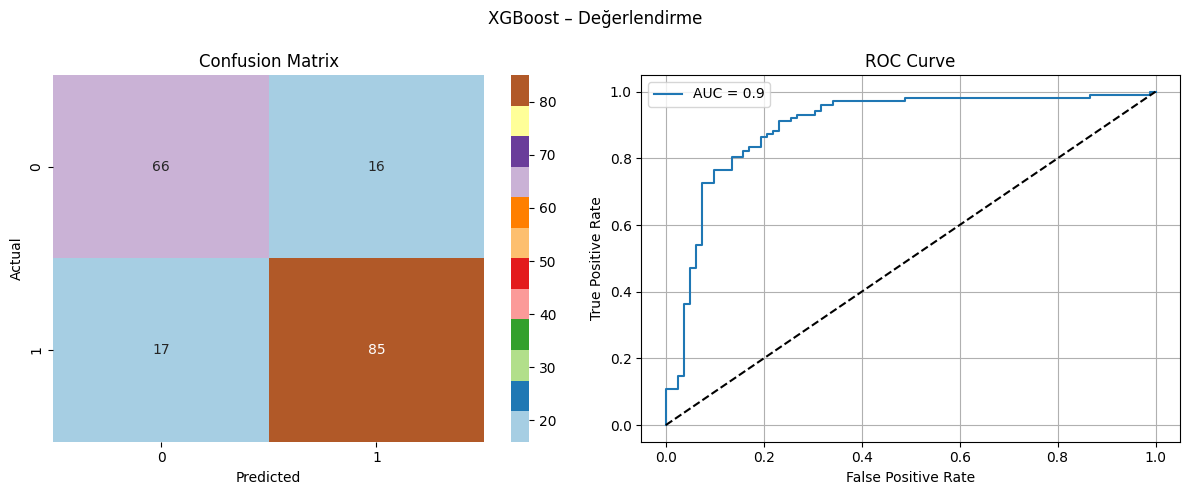


--- Gradient Boosting Modeli Eğitiliyor ve Değerlendiriliyor ---


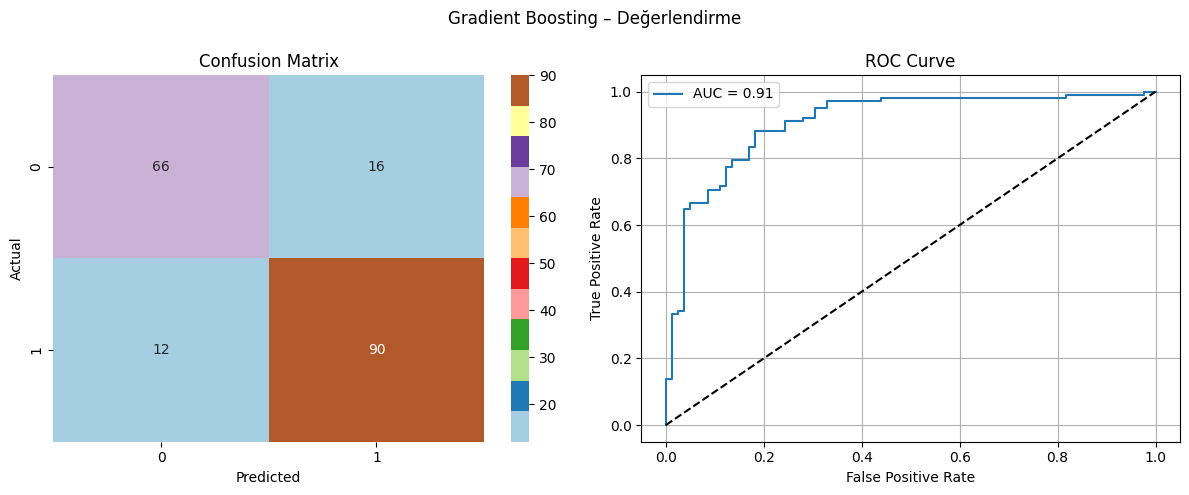


--- CatBoost Modeli Eğitiliyor ve Değerlendiriliyor ---


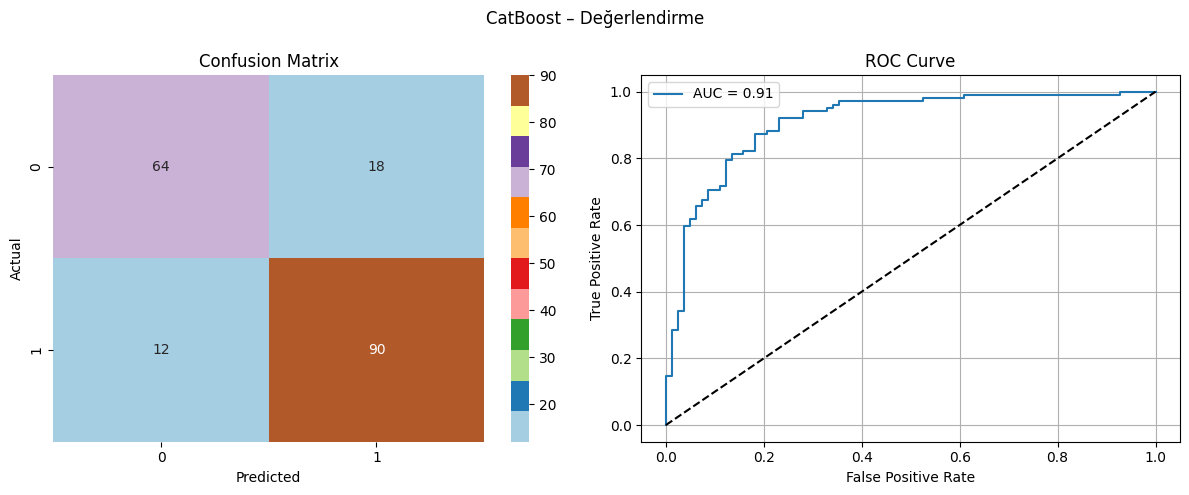

In [ ]:
# Sonuçları ve görselleri tutmak için
all_model_metrics = {}

for name, model in model_list.items():
    print(f"\n--- {name} Modeli Eğitiliyor ve Değerlendiriliyor ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = (
        model.predict_proba(X_test)[:, 1]
        if hasattr(model, "predict_proba")
        else None
    )

    acc = round(accuracy_score(y_test, y_pred), 2)
    prec = round(precision_score(y_test, y_pred), 2)
    rec = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    auc = round(roc_auc_score(y_test, y_prob), 2) if y_prob is not None else "N/A"

    all_model_metrics[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC-AUC": auc,
    }
    # Subplot: Confusion Matrix ve ROC
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"{name} – Değerlendirme")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Paired", ax=axs[0])
    axs[0].set_title("Confusion Matrix")
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("Actual")

    # ROC Curve
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        axs[1].plot(fpr, tpr, label=f"AUC = {auc}")
        axs[1].plot([0, 1], [0, 1], "k--")
        axs[1].set_title("ROC Curve")
        axs[1].set_xlabel("False Positive Rate")
        axs[1].set_ylabel("True Positive Rate")
        axs[1].legend()
        axs[1].grid(True)
    else:
        axs[1].text(0.3, 0.5, "ROC Curve\nkullanılamaz", fontsize=14)
        axs[1].axis("off")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()


### Figür: Confusion Matrix ve ROC Eğrisi Görselleştirme

In [ ]:
print("\n--- Tüm Modellerin Metrikleri ---")
print(pd.DataFrame(all_model_metrics).T)


--- Tüm Modellerin Metrikleri ---
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Logistic Regression      0.83       0.82    0.87      0.85     0.91
Random Forest            0.84       0.85    0.87      0.86     0.91
KNN                      0.84       0.82    0.91      0.86     0.88
SVM                      0.84       0.82    0.90      0.86     0.90
XGBoost                  0.82       0.84    0.83      0.84     0.90
Gradient Boosting        0.85       0.85    0.88      0.87     0.91
CatBoost                 0.84       0.83    0.88      0.86     0.91


In [ ]:
accuracies = {name: metrics["Accuracy"] for name, metrics in all_model_metrics.items()}
best_model_name = max(accuracies, key=accuracies.get)
best_model = model_list[best_model_name]
print(f"\n En iyi performans gösteren model: {best_model_name}")


 En iyi performans gösteren model: Gradient Boosting


### Figür: Model Doğruluk Karşılaştırması

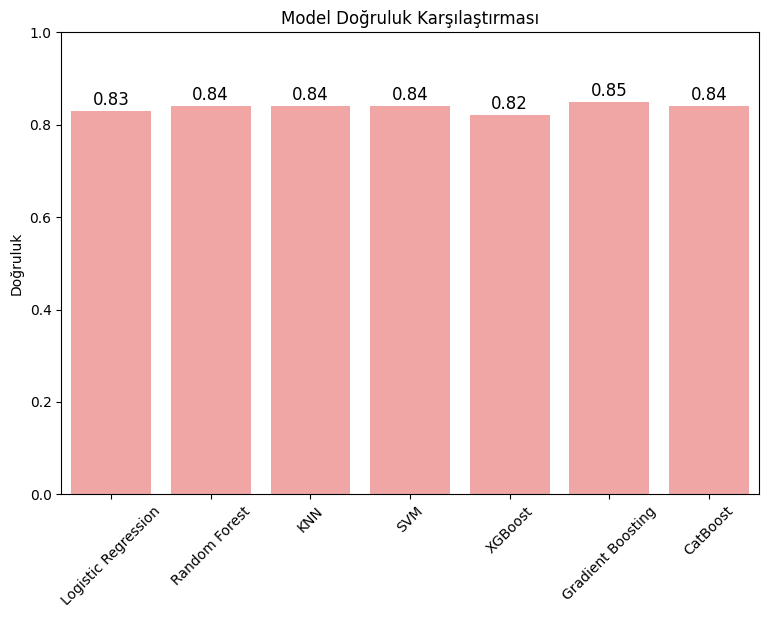

In [ ]:
fig, ax= plt.subplots(figsize=(9, 6))

sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), ax=ax, color=paired_colors[4])
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                size=12, xytext=(0, 8),
                textcoords='offset points')
plt.title('Model Doğruluk Karşılaştırması')
plt.xticks(rotation=45)
plt.ylabel('Doğruluk')
plt.ylim(0, 1.0)
plt.show()

* **Accuracy** ve **F1-Score** açısından en yüksek başarıyı Gradient Boosting sağlamıştır.
* ROC-AUC değeri de oldukça yüksek (0.91), bu da modelin pozitif sınıfı iyi ayırt ettiğini gösteriyor.
* **Recall değeri (0.88)** en yüksek olduğu için, kalp hastalığı olan bireyleri tespit etmede daha başarılı.

In [ ]:
for name, model in model_list.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name}: Mean Accuracy = {scores.mean():.2f}")

Logistic Regression: Mean Accuracy = 0.77
Random Forest: Mean Accuracy = 0.72
KNN: Mean Accuracy = 0.72
SVM: Mean Accuracy = 0.74
XGBoost: Mean Accuracy = 0.69
Gradient Boosting: Mean Accuracy = 0.66
CatBoost: Mean Accuracy = 0.71


Model performanslarını daha güvenilir ve veri bağımlılığından bağımsız değerlendirebilmek için 5-Fold veya benzeri çapraz doğrulama yöntemleri uygulanmıştır.

* **Logistic Regression**, çapraz doğrulama sırasında en stabil ve genellenebilir performansı göstermiştir.
* **SVM** ve **Random Forest** yakın skorlarla ikinci sırayı paylaşmaktadır.
* **Boosting tabanlı modeller (XGBoost, Gradient Boosting, CatBoost)** daha düşük ortalama doğruluk göstermiştir. Bu durum, bu modellerin overfitting'e daha yatkın olabileceğini veya veri boyutu/model karmaşıklığına göre ayarlarının yeterli olmadığını gösterebilir.
* Bu sonuçlar, eğitim/test seti üzerinde elde edilen başarı skorlarıyla birlikte değerlendirilerek model seçimi yapılmalıdır.

> Özellikle medikal verilerde **genellenebilirlik** çok önemlidir. Bu yüzden sadece test skorları değil, çapraz doğrulama skorları da dikkate alınmalıdır.

### Figür: Model Karşılaştırması – Ortalama Doğruluk (5-Fold CV)

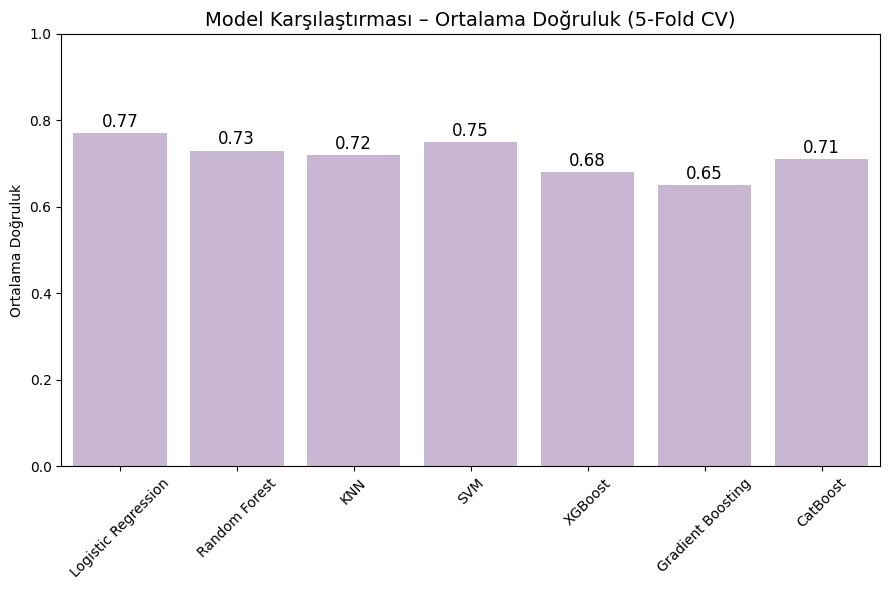

In [ ]:
# Cross-validation doğruluk skorları
cv_scores = {
    "Logistic Regression": 0.77,
    "Random Forest": 0.73,
    "KNN": 0.72,
    "SVM": 0.75,
    "XGBoost": 0.68,
    "Gradient Boosting": 0.65,
    "CatBoost": 0.71
}


paired_colors = paired_palette.as_hex()

# Grafik
fig, ax = plt.subplots(figsize=(9, 6))

sns.barplot(
    x=list(cv_scores.keys()),
    y=list(cv_scores.values()),
    ax=ax,
    color=paired_colors[8]  # istediğin rengi buradan değiştirebilirsin
)

for bar in ax.patches:
    ax.annotate(
        format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='center',
        size=12, xytext=(0, 8),
        textcoords='offset points'
    )

plt.title('Model Karşılaştırması – Ortalama Doğruluk (5-Fold CV)', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Ortalama Doğruluk')
plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()


###  5-Fold Cross Validation Sonuçları ve Yorumum

Yukarıdaki grafikte, modellerin 5 katlı çapraz doğrulama (5-Fold CV) ile elde ettikleri ortalama doğruluk (mean accuracy) değerlerini karşılaştırdım. Bu yöntemi kullanmamın sebebi, modellerin yalnızca bir test seti üzerinde değil, farklı veri parçalarında da ne kadar tutarlı performans gösterdiğini görmek istememdi.

Bu sonuçlardan şu çıkarımı yaptım:

- **Logistic Regression**, 0.77 ortalama doğruluk ile en istikrarlı ve genellenebilir model oldu.
- **SVM (0.75)** ve **Random Forest (0.73)** da ona yakın başarı gösterdi.
- **Boosting tabanlı modeller (XGBoost, Gradient Boosting, CatBoost)** ise test setinde yüksek performans göstermelerine rağmen, çapraz doğrulama sonuçlarında daha düşük kaldı. Bu da bu modellerin veri setime göre daha fazla parametre ayarına ihtiyaç duyduğunu ya da overfitting eğilimi gösterdiğini düşündürdü.

Bu nedenle sadece test seti skoruna değil, çapraz doğrulama sonuçlarına da bakarak **modelin genellenebilirliğini değerlendirmeyi önemli buluyorum.**


In [ ]:
overfit_check = {}

for name, model in model_list.items():
    model.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))

    overfit_check[name] = {
        'Train Accuracy': round(train_acc, 2),
        'Test Accuracy': round(test_acc, 2),
        'Fark': round(train_acc - test_acc, 2)
    }


overfit_df = pd.DataFrame(overfit_check).T.sort_values('Fark', ascending=False)
print(overfit_df)


                     Train Accuracy  Test Accuracy  Fark
XGBoost                        1.00           0.82  0.18
Random Forest                  1.00           0.84  0.16
CatBoost                       0.96           0.84  0.12
Gradient Boosting              0.92           0.85  0.07
SVM                            0.86           0.84  0.02
KNN                            0.85           0.84  0.01
Logistic Regression            0.83           0.83  0.00


### Figür: Tüm Modellerde Eğitim/Test Doğrulukları (Overfitting Kontrolü)

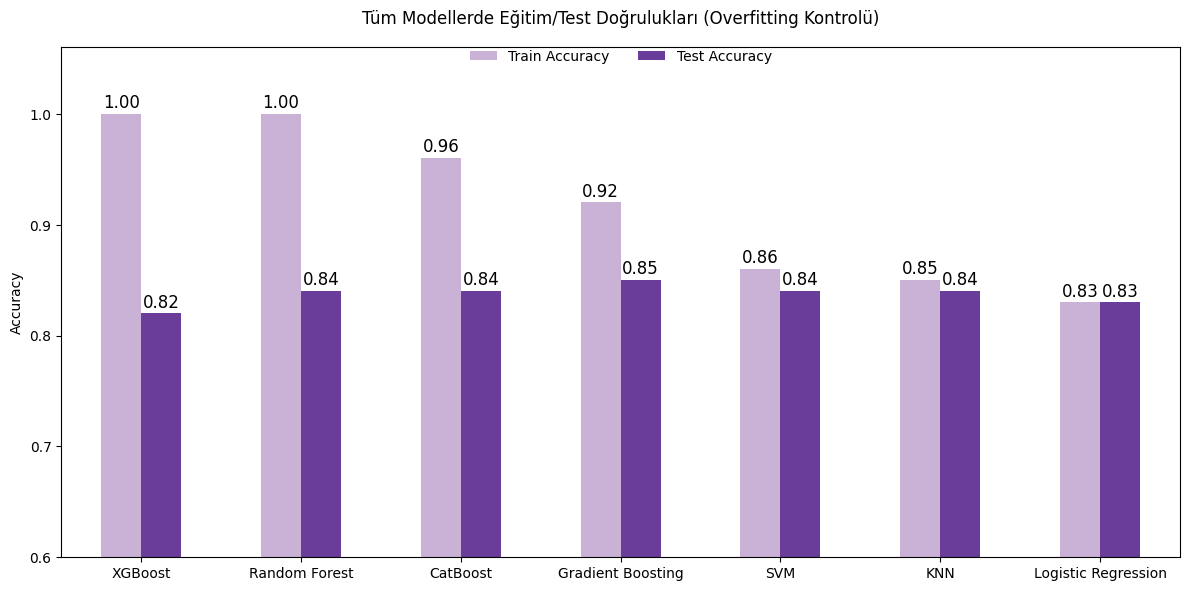

In [ ]:
ax = overfit_df[['Train Accuracy', 'Test Accuracy']].plot(
    kind='bar', figsize=(12,6), color=[paired_colors[8], paired_colors[9]]
)
plt.title('Tüm Modellerde Eğitim/Test Doğrulukları (Overfitting Kontrolü)', y=1.03)
plt.xticks(rotation=0)
plt.legend(frameon=False, ncol= 2, bbox_to_anchor=(0.5, 1.02), loc='upper center')
for bar in ax.patches:
    ax.annotate(f'{bar.get_height():.2f}',
                       (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center',
                       size=12, xytext=(0, 8),
                       textcoords='offset points')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1.06)
plt.tight_layout()
plt.show()

# Tuning Yapılmış Modelleme

In [ ]:
### 1. Model ve Parametre Grid Tanımlamaları ###
models_params = {
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': list(range(3, 11)),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric="logloss", use_label_encoder=False),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3, 5]
        }
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {
            "iterations": [100, 200],
            "learning_rate": [0.01, 0.1],
            "depth": [4, 6]
        }
    }
}


In [ ]:
### 2. GridSearchCV ile Model Tuning ve Sonuçların Kaydı ###
results = []

for name, config in models_params.items():
    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring='accuracy', n_jobs=-1)
    try:
        grid.fit(X_train, y_train)
        results.append({
            "Model": name,
            "Best Params": grid.best_params_,
            "Best Accuracy": round(grid.best_score_, 4)
        })
    except Exception as e:
        results.append({
            "Model": name,
            "Best Params": str(e),
            "Best Accuracy": "Error"
        })

tuning_results_df = pd.DataFrame(results)
print(tuning_results_df)


                 Model                                        Best Params  \
0        Random Forest  {'max_depth': 10, 'min_samples_leaf': 2, 'min_...   
1                  KNN  {'metric': 'manhattan', 'n_neighbors': 10, 'we...   
2  Logistic Regression                        {'C': 1, 'solver': 'lbfgs'}   
3                  SVM                      {'C': 10, 'kernel': 'linear'}   
4    Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
5              XGBoost  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
6             CatBoost  {'depth': 6, 'iterations': 200, 'learning_rate...   

   Best Accuracy  
0         0.8179  
1         0.8043  
2         0.8193  
3         0.8179  
4         0.8043  
5         0.8139  
6         0.8071  


### Figür: Confusion Matrix ve ROC Eğrisi (Tuning sonrası)


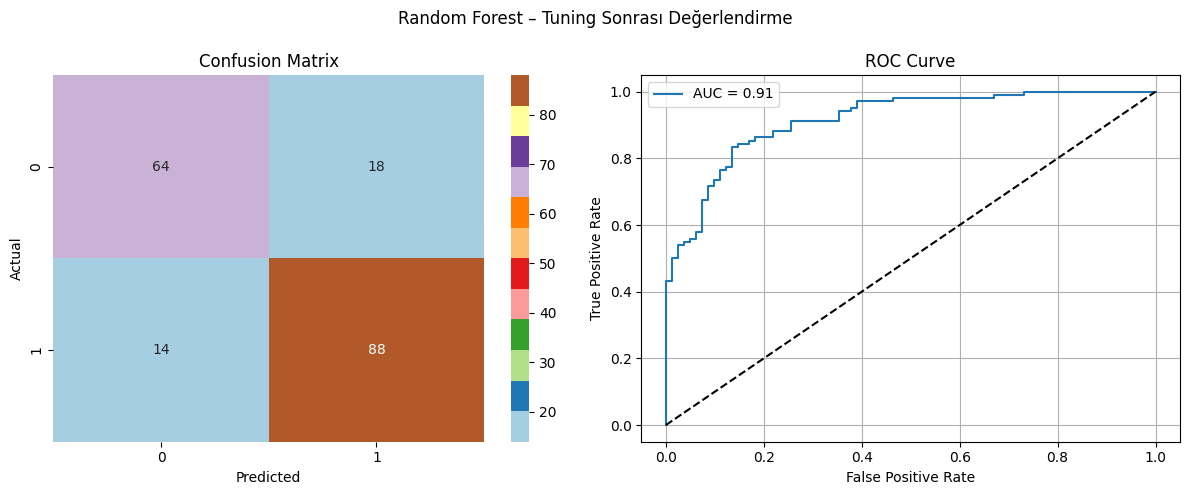

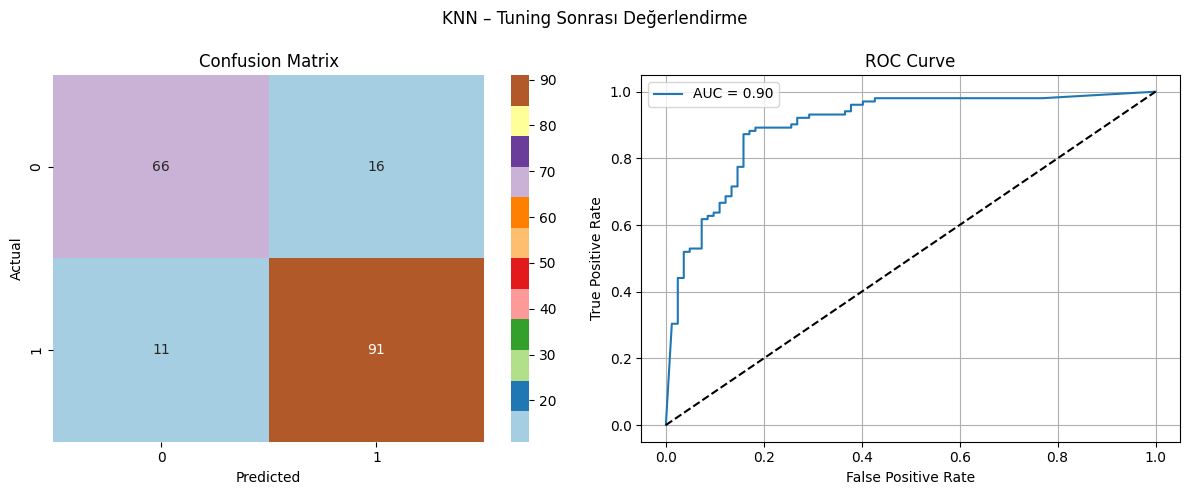

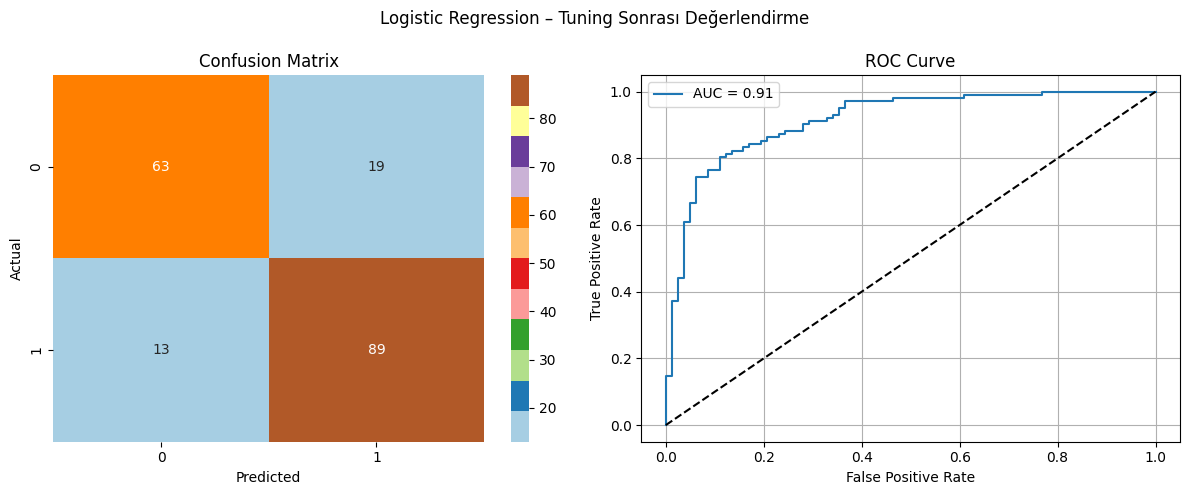

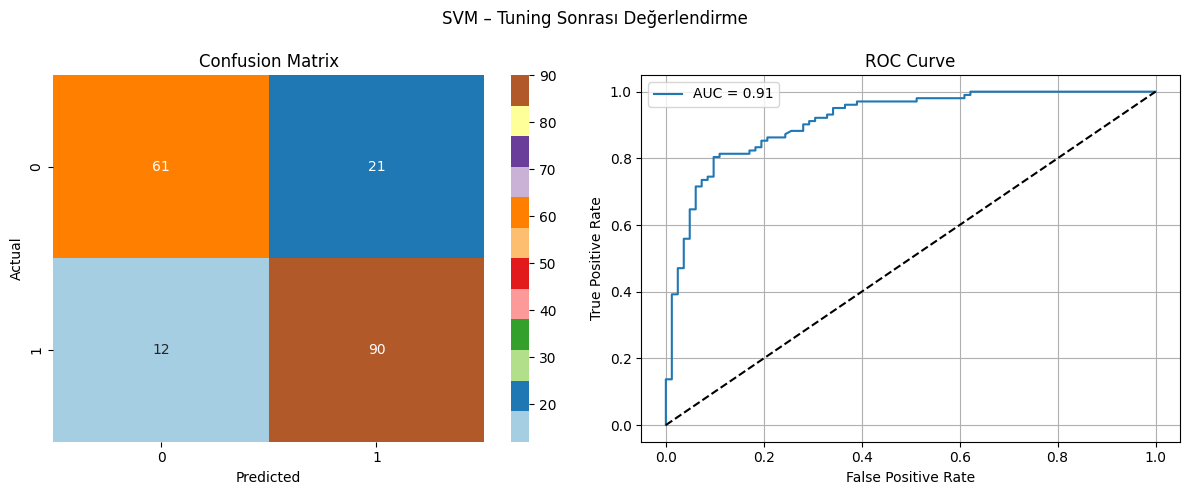

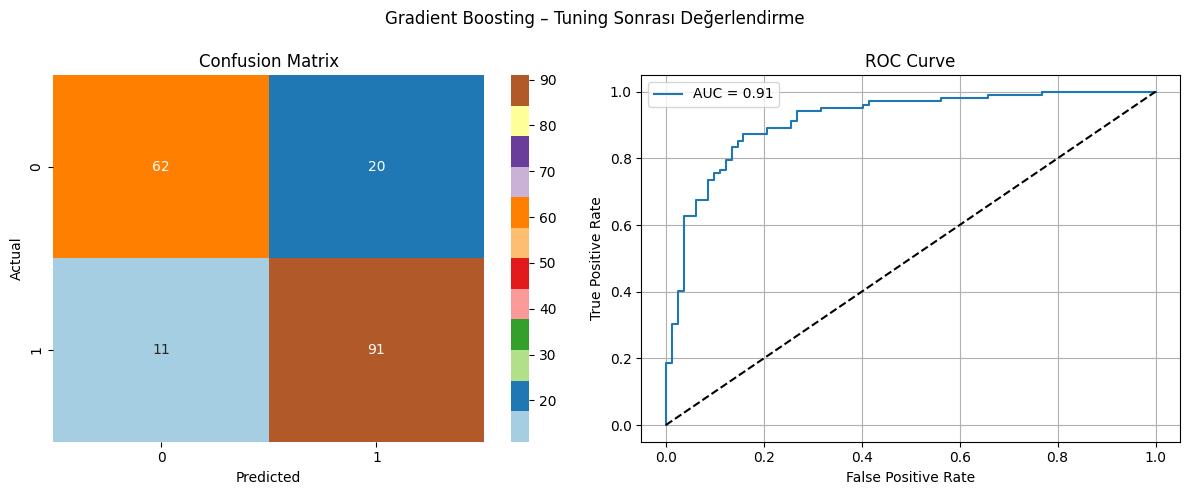

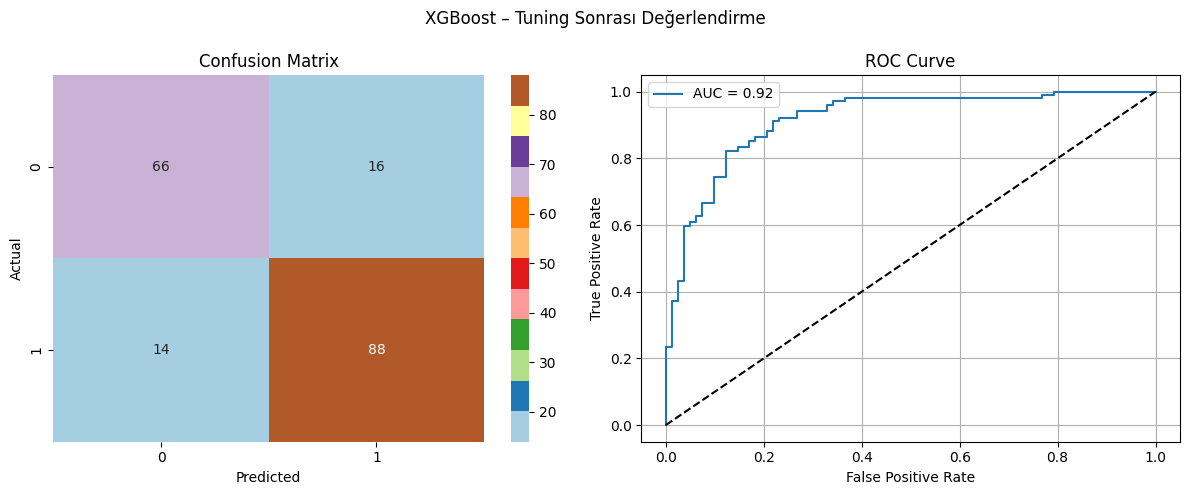

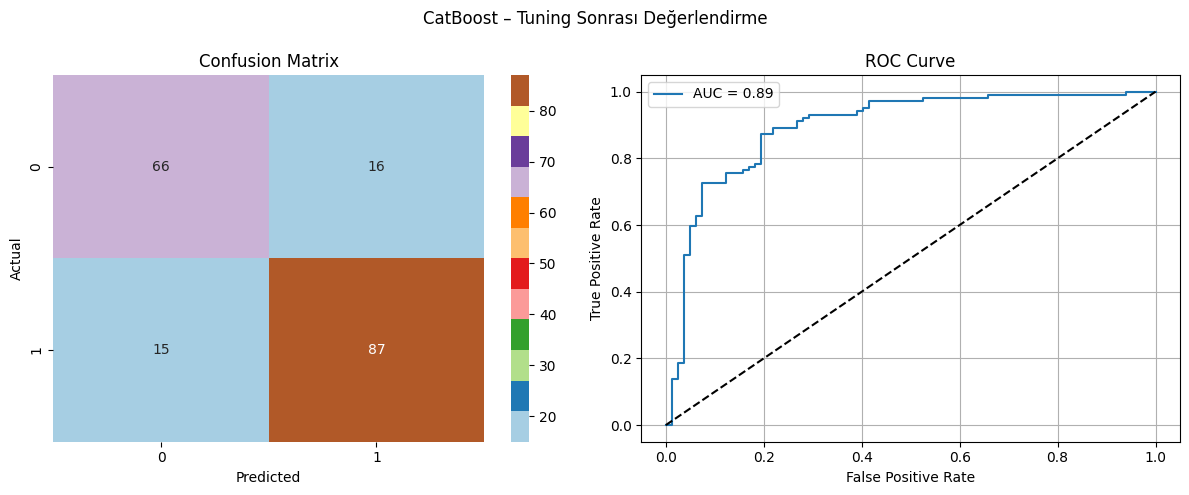


 Model Performans Özeti Tablosu:

              Model   AUC  False Negative  False Positive  Train Accuracy  Test Accuracy  Fark
      Random Forest 0.915              14              18           0.939          0.826 0.113
                KNN 0.899              11              16           1.000          0.853 0.147
Logistic Regression 0.914              13              19           0.830          0.826 0.004
                SVM 0.914              12              21           0.832          0.821 0.011
  Gradient Boosting 0.915              11              20           0.966          0.832 0.135
            XGBoost 0.916              14              16           0.927          0.837 0.090
           CatBoost 0.894              15              16           0.996          0.832 0.164


In [ ]:
# Sonuçları saklayacağımız liste
model_results = []

for index, row in tuning_results_df.iterrows():
    model_name = row['Model']
    best_params = row['Best Params']
    model_instance = models_params[model_name]['model']
    model_instance.set_params(**best_params)
    model_instance.fit(X_train, y_train)

    # Tahminler
    y_pred = model_instance.predict(X_test)
    y_prob = model_instance.predict_proba(X_test)[:, 1]
    y_train_pred = model_instance.predict(X_train)

    # Confusion Matrix ve metrikler
    cm = confusion_matrix(y_test, y_pred)
    fn = cm[1, 0]
    fp = cm[0, 1]
    auc = roc_auc_score(y_test, y_prob)
    test_acc = accuracy_score(y_test, y_pred)
    train_acc = accuracy_score(y_train, y_train_pred)
    fark = abs(train_acc - test_acc)

    # Sonuçları listeye ekle
    model_results.append({
        "Model": model_name,
        "AUC": round(auc, 3),
        "False Negative": fn,
        "False Positive": fp,
        "Train Accuracy": round(train_acc, 3),
        "Test Accuracy": round(test_acc, 3),
        "Fark": round(fark, 3),

    })

    # Grafikler
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"{model_name} – Tuning Sonrası Değerlendirme")

    # Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Paired", ax=axs[0])
    axs[0].set_title("Confusion Matrix")
    axs[0].set_xlabel("Predicted")
    axs[0].set_ylabel("Actual")

    # ROC Curve
    axs[1].plot(fpr, tpr, label=f"AUC = {auc:.2f}")
    axs[1].plot([0, 1], [0, 1], "k--")
    axs[1].set_title("ROC Curve")
    axs[1].set_xlabel("False Positive Rate")
    axs[1].set_ylabel("True Positive Rate")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

# Sonuç tablosunu DataFrame olarak göster
results_df = pd.DataFrame(model_results)
print("\n Model Performans Özeti Tablosu:\n")
print(results_df.to_string(index=False))


Bu çalışmada, kalp hastalığı riski taşıyan bireylerin sınıflandırılması için farklı makine öğrenmesi modelleri karşılaştırılmıştır. Model seçiminde yalnızca istatistiksel başarı değil, medikal açıdan hata türlerinin etkisi de göz önünde bulundurulmuştur.

Bu sonuçlardan şunu çıkardım:

- Medikal sınıflandırma problemlerinde **False Negative (FN)** oranı kritik öneme sahiptir. Çünkü bir hastanın "sağlıklı" olarak etiketlenmesi, teşhis ve tedavinin gecikmesine sebep olabilir.
- FN oranı en düşük olan modeller **KNN** ve **Gradient Boosting** oldu. Bu nedenle klinik açıdan en güvenli modeller olarak değerlendirdim.
- **XGBoost**, genel olarak en yüksek ROC AUC skoruna sahipti ve dengeli sonuçlar verdiği için güvenilir bir alternatif olarak öne çıkıyor.
- Basit ve yorumlanabilir yapısıyla **Logistic Regression**, FP ve FN oranları açısından dengeli ve özellikle açıklanabilirliğin önemli olduğu durumlarda tercih edilebilir.
- **CatBoost**, ROC AUC değerinin en düşük olması ve FN oranının en yüksek çıkması nedeniyle bu senaryoda daha az uygun bir model olarak değerlendirildi.

Sonuç olarak, eğer öncelik hastalık riskini kaçırmamaksa **KNN veya Gradient Boosting**, genel başarı dengesi arayan durumlarda ise **XGBoost** en uygun model seçenekleridir. Klinik kullanım için model seçiminde sadece doğruluk değil, hangi hata türünün daha riskli olduğu mutlaka dikkate alınmalıdır.


In [ ]:
from sklearn.model_selection import cross_val_score
import pandas as pd

# 1. Tuning ÖNCESİ mean accuracy
original_scores = {}

for name, model in model_list.items():
    # CatBoost ise verbose'u 0 yap
    model_class = model.__class__
    fresh_model = model_class()
    if 'verbose' in fresh_model.get_params().keys():
        fresh_model.set_params(verbose=0)
    fresh_model.set_params(**model.get_params())

    scores = cross_val_score(fresh_model, X, y, cv=5, scoring='accuracy')
    original_scores[name] = scores.mean()

# 2. Tuning SONRASI mean accuracy
tuned_scores = {}

for index, row in tuning_results_df.iterrows():
    name = row['Model']
    best_params = row['Best Params']

    model_class = models_params[name]['model'].__class__
    fresh_model = model_class()
    if 'verbose' in fresh_model.get_params().keys():
        fresh_model.set_params(verbose=0)
    fresh_model.set_params(**best_params)

    scores = cross_val_score(fresh_model, X, y, cv=5, scoring='accuracy')
    tuned_scores[name] = scores.mean()

# 3. Karşılaştırmalı tablo
print("\n Tuning Öncesi vs. Sonrası 5-Fold Mean Accuracy:\n")
print(f"{'Model':<20} {'Original':<10} {'Tuned':<10} {'+Delta':<10}")
print("-" * 50)

for model in original_scores:
    orig = original_scores[model]
    tuned = tuned_scores.get(model, None)
    delta = tuned - orig if tuned is not None else None
    print(f"{model:<20} {orig:<10.3f} {tuned:<10.3f} {delta:<+10.3f}")


0:	learn: 0.6339431	total: 1.71ms	remaining: 340ms
1:	learn: 0.5890884	total: 3.55ms	remaining: 351ms
2:	learn: 0.5562329	total: 4.62ms	remaining: 303ms
3:	learn: 0.5212307	total: 6.1ms	remaining: 299ms
4:	learn: 0.4955785	total: 7.63ms	remaining: 298ms
5:	learn: 0.4766018	total: 9.12ms	remaining: 295ms
6:	learn: 0.4575442	total: 10.6ms	remaining: 293ms
7:	learn: 0.4413318	total: 12.1ms	remaining: 289ms
8:	learn: 0.4223908	total: 13.6ms	remaining: 288ms
9:	learn: 0.4083598	total: 15ms	remaining: 286ms
10:	learn: 0.3982862	total: 16.5ms	remaining: 284ms
11:	learn: 0.3883147	total: 18.1ms	remaining: 284ms
12:	learn: 0.3828250	total: 19.6ms	remaining: 282ms
13:	learn: 0.3770891	total: 21.1ms	remaining: 280ms
14:	learn: 0.3697035	total: 22.6ms	remaining: 278ms
15:	learn: 0.3597410	total: 24.1ms	remaining: 277ms
16:	learn: 0.3510115	total: 25.5ms	remaining: 275ms
17:	learn: 0.3462120	total: 27.1ms	remaining: 274ms
18:	learn: 0.3405737	total: 28.5ms	remaining: 272ms
19:	learn: 0.3368357	tota

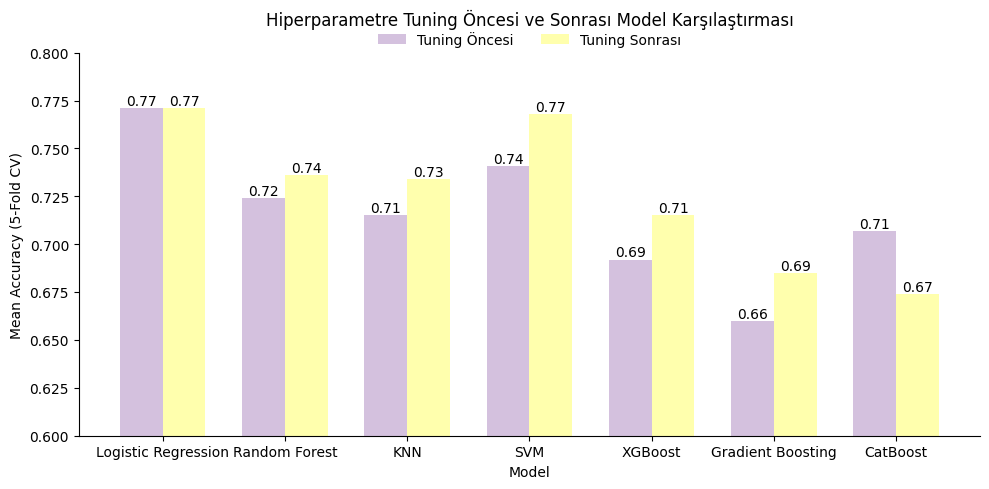

In [ ]:
original_scores = {
    "Logistic Regression": 0.771,
    "Random Forest": 0.724,
    "KNN": 0.715,
    "SVM": 0.741,
    "XGBoost": 0.692,
    "Gradient Boosting": 0.660,
    "CatBoost": 0.707
}


tuned_scores = {
    "Logistic Regression": 0.771,
    "Random Forest": 0.736,
    "KNN": 0.734,
    "SVM": 0.768,
    "XGBoost": 0.715,
    "Gradient Boosting": 0.685,
    "CatBoost": 0.674
}


models = list(original_scores.keys())
original = [original_scores[m] for m in models]
tuned = [tuned_scores[m] for m in models]
paired_colors = sns.color_palette("Paired", n_colors=12)

plt.figure(figsize=(10, 5))
bar_width = 0.35
index = range(len(models))

plt.bar(index, original, bar_width, label='Tuning Öncesi', alpha=0.8, color=paired_colors[8])
plt.bar([i + bar_width for i in index], tuned, bar_width, label='Tuning Sonrası', alpha=0.8, color=paired_colors[10])

for i in index:
    plt.text(i, original[i], f'{original[i]:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i + bar_width, tuned[i], f'{tuned[i]:.2f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0.6, .8)
plt.xlabel('Model')
plt.ylabel('Mean Accuracy (5-Fold CV)')
plt.title('Hiperparametre Tuning Öncesi ve Sonrası Model Karşılaştırması', y=1.05)
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.09), ncol=2, frameon=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()




Hiperparametre tuning işlemi, çoğu modelin doğruluk oranında iyileşme sağlamıştır.
Bu iyileşmeler, model performansının yalnızca algoritma seçimine değil, doğru parametre kombinasyonuna da bağlı olduğunu göstermektedir.

* **SVM**, **XGBoost** ve **Gradient Boosting**, tuning sonrasında en belirgin doğruluk artışını yaşamıştır. Bu durum, bu modellerin parametre hassasiyetinin yüksek olduğunu ortaya koyar.
* **KNN** ve **Random Forest**, tuning sonrası daha sınırlı fakat anlamlı kazanımlar elde etmiştir.
* **Logistic Regression**, tuning öncesi ve sonrası aynı doğruluğu verdiğinden parametrelerden fazla etkilenmemiştir. Yorumlanabilirliğin önemli olduğu durumlar için halen güçlü bir tercihtir.
* **CatBoost**’ta tuning sonrası doğrulukta küçük bir düşüş gözlemlenmiştir. Bu durum, varsayılan ayarlarının zaten oldukça optimize olabileceğini düşündürmektedir.

Genel olarak grafik, tuning işleminin model başarımını artırmada önemli bir rol oynadığını ve her model için ayrı ayrı değerlendirilmesi gerektiğini göstermektedir.


Bu proje, medikal veri analizi ile yapay zeka modellerinin nasıl birleşebileceğini gösteren uçtan uca bir çalışmaydı.

Veri setini yalnızca sayısal olarak değil, klinik bağlamda da ele alarak eksik ve aykırı verileri anlamlı şekilde yönettim.
Modelleme sürecinde ise yalnızca doğruluk oranlarına değil, hasta kaçırma riskine yani False Negative değerine öncelik verdim.

Sonuçlara göre, KNN modeli en düşük FN değeriyle klinik riski en aza indirirken, Lojistik Regresyon stabil yapısıyla güvenilir bir karar destek aracı oldu.

Bu analiz, erken teşhisin hayati önem taşıdığı kalp hastalıkları gibi alanlarda veri bilimi desteğinin ne kadar değerli olabileceğini bir kez daha ortaya koyuyor.

